In [173]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import MinMaxScaler

In [174]:
beijing = pd.read_csv("new.csv", encoding="gbk")
beijing_raw = pd.read_csv("new.csv", encoding="gbk")
original_data = pd.read_csv("new.csv", encoding="gbk")

beijing.drop(["url", "id","DOM","followers"],axis=1, inplace=True)


In [175]:
'''beijing_dtypes_sorted = beijing.dtypes.sort_values()
print(beijing_dtypes_sorted)'''

'beijing_dtypes_sorted = beijing.dtypes.sort_values()\nprint(beijing_dtypes_sorted)'

In [176]:
"""drawingRoom_categories = beijing['drawingRoom'].value_counts()
print("\nDrawingRoom Categories and Their Counts (After Removal):")
print(drawingRoom_categories)"""

'drawingRoom_categories = beijing[\'drawingRoom\'].value_counts()\nprint("\nDrawingRoom Categories and Their Counts (After Removal):")\nprint(drawingRoom_categories)'

In [177]:
beijing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318851 entries, 0 to 318850
Data columns (total 22 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Lng                  318851 non-null  float64
 1   Lat                  318851 non-null  float64
 2   Cid                  318851 non-null  int64  
 3   tradeTime            318851 non-null  object 
 4   totalPrice           318851 non-null  float64
 5   price                318851 non-null  int64  
 6   square               318851 non-null  float64
 7   livingRoom           318851 non-null  object 
 8   drawingRoom          318851 non-null  object 
 9   kitchen              318851 non-null  int64  
 10  bathRoom             318851 non-null  object 
 11  floor                318851 non-null  object 
 12  buildingType         316830 non-null  float64
 13  constructionTime     318851 non-null  object 
 14  renovationCondition  318851 non-null  int64  
 15  buildingStructure

# 4.3 EDA

# 4.3.2 Data Overview

In [178]:
beijing.head()

,Lng,Lat,Cid,tradeTime,totalPrice,price,square,livingRoom,drawingRoom,kitchen,...,buildingType,constructionTime,renovationCondition,buildingStructure,ladderRatio,elevator,fiveYearsProperty,subway,district,communityAverage
0,116.475489,40.019520,1111027376244,2016-08-09,415.0,31680,131.00,2,1,1,...,1.0,2005,3,6,0.217,1.0,0.0,1.0,7,56021.0
1,116.453917,39.881534,1111027381879,2016-07-28,575.0,43436,132.38,2,2,1,...,1.0,2004,4,6,0.667,1.0,1.0,0.0,7,71539.0
2,116.561978,39.877145,1111040862969,2016-12-11,1030.0,52021,198.00,3,2,1,...,4.0,2005,3,6,0.500,1.0,0.0,0.0,7,48160.0
3,116.438010,40.076114,1111043185817,2016-09-30,297.5,22202,134.00,3,1,1,...,1.0,2008,1,6,0.273,1.0,0.0,0.0,6,51238.0
4,116.428392,39.886229,1111027381174,2016-08-28,392.0,48396,81.00,2,1,1,...,4.0,1960,2,2,0.333,0.0,1.0,1.0,1,62588.0


本小节的目的是将所有变量都转换成模型可用的数值型变量。具体目标是数值没有缺失值，所有类型都为int或者float，并且没有异常值。异常值包括 错误的信息，通常采用过滤的方法去除。本部分会涉及图标的展示，但是目的是为了找出异常的数据，不会进行意义分析。意义分析在下一小节的EDA部分。

In [179]:
# 计算每列的缺失值数量
missing_values = beijing.isnull().sum()

# 计算每列的缺失值占总数据数量的百分比
missing_percentage = (missing_values / len(beijing)) * 100

# 创建包含缺失值数量和百分比的 DataFrame
missing_info = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage})

# 显示结果
print(missing_info)


                     Missing Values  Percentage
Lng                               0    0.000000
Lat                               0    0.000000
Cid                               0    0.000000
tradeTime                         0    0.000000
totalPrice                        0    0.000000
price                             0    0.000000
square                            0    0.000000
livingRoom                        0    0.000000
drawingRoom                       0    0.000000
kitchen                           0    0.000000
bathRoom                          0    0.000000
floor                             0    0.000000
buildingType                   2021    0.633838
constructionTime                  0    0.000000
renovationCondition               0    0.000000
buildingStructure                 0    0.000000
ladderRatio                       0    0.000000
elevator                         32    0.010036
fiveYearsProperty                32    0.010036
subway                           32    0

In [180]:
beijing.shape

(318851, 22)

In [181]:
beijing_dtypes_sorted = beijing.dtypes.sort_values()
print(beijing_dtypes_sorted)

import pandas as pd

# Assuming you already have beijing_dtypes_sorted as a Series with sorted data types

# Create a DataFrame from the Series
dtype_df = pd.DataFrame({'Data Type': beijing_dtypes_sorted})

# Reset the index to include the column names
dtype_df.reset_index(inplace=True)
dtype_df.rename(columns={'index': 'Variable'}, inplace=True)

# Export the DataFrame to a CSV file
dtype_df.to_csv('beijing_data_types.csv', index=False)


Cid                      int64
price                    int64
buildingStructure        int64
renovationCondition      int64
kitchen                  int64
district                 int64
Lng                    float64
subway                 float64
fiveYearsProperty      float64
elevator               float64
ladderRatio            float64
buildingType           float64
communityAverage       float64
square                 float64
totalPrice             float64
Lat                    float64
constructionTime        object
drawingRoom             object
livingRoom              object
tradeTime               object
floor                   object
bathRoom                object
dtype: object


In [182]:
import pandas as pd

feature_category_counts = {}
feature_data_types = {}

for feature in beijing.columns:
    category_count = beijing[feature].nunique()
    feature_category_counts[feature] = category_count
    data_type = beijing[feature].dtype
    feature_data_types[feature] = data_type

category_counts_df = pd.DataFrame({'Feature': list(feature_category_counts.keys()),
                                   'Category Count': list(feature_category_counts.values()),
                                   'Type': list(feature_data_types.values())})

category_counts_df = category_counts_df.sort_values(by='Type')

print(category_counts_df)


                Feature  Category Count     Type
2                   Cid            4035    int64
5                 price           80042    int64
15    buildingStructure               7    int64
14  renovationCondition               5    int64
9               kitchen               5    int64
20             district              13    int64
0                   Lng            3995  float64
19               subway               2  float64
18    fiveYearsProperty               2  float64
17             elevator               2  float64
16          ladderRatio             183  float64
12         buildingType              12  float64
21     communityAverage            4072  float64
6                square           18298  float64
4            totalPrice            5780  float64
1                   Lat            3993  float64
13     constructionTime              74   object
8           drawingRoom              28   object
7            livingRoom              21   object
3             tradeT

在进行数据分析和建模时，object类型的特征通常需要进行适当的数据类型转换。这是因为大多数机器学习算法和统计方法要求输入数据是数值型的，而object类型通常包含字符串或文本信息，不适用于大多数模型。

### LivingRoom

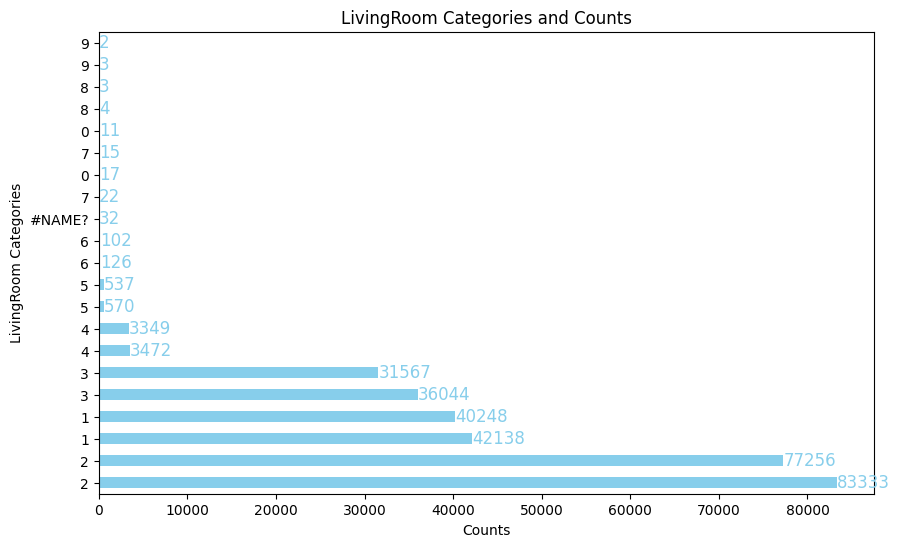

In [183]:
import pandas as pd
import matplotlib.pyplot as plt


livingRoom_categories = beijing['livingRoom'].value_counts()


plt.figure(figsize=(10, 6)) 


ax = livingRoom_categories.plot(kind='barh', color='skyblue')

for i, v in enumerate(livingRoom_categories):
    ax.text(v, i, str(v), color='skyblue', va='center', fontsize=12)

plt.title('LivingRoom Categories and Counts')
plt.xlabel('Counts')
plt.ylabel('LivingRoom Categories')

plt.show()

可以观察到有异常值，其值为"#NAME?"。因此筛选并删除掉长度大于1的值，将其过滤。并将livingRoom的数值类型从object转换为int。

In [184]:
import pandas as pd
import matplotlib.pyplot as plt

# 删除'livingRoom'列中值的长度大于1的条目
beijing['livingRoom_Length'] = beijing['livingRoom'].apply(lambda x: len(str(x)))
beijing = beijing[beijing['livingRoom_Length'] <= 1]

livingRoom_counts = beijing['livingRoom'].value_counts()
print(livingRoom_counts)

2    83333
2    77256
1    42138
1    40248
3    36044
3    31567
4     3472
4     3349
5      570
5      537
6      126
6      102
7       22
0       17
7       15
0       11
8        4
8        3
9        3
9        2
Name: livingRoom, dtype: int64


成功了！

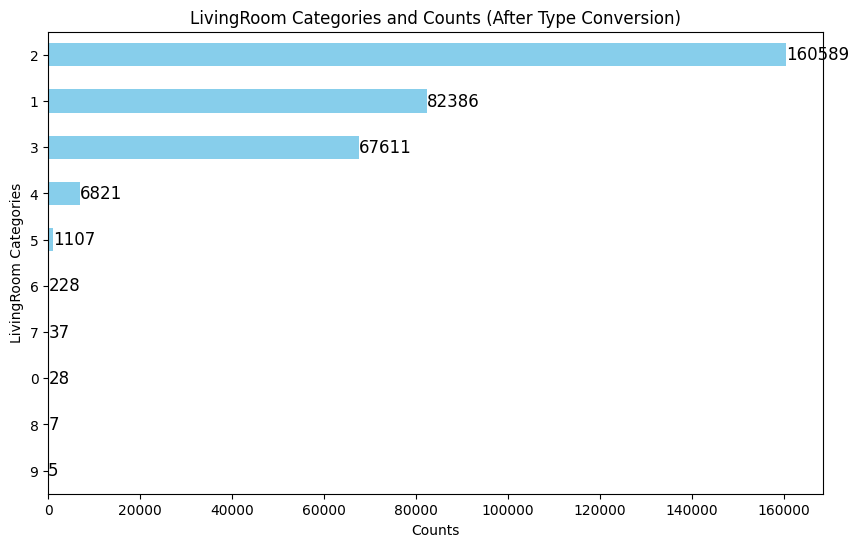

In [185]:
import pandas as pd
import matplotlib.pyplot as plt


beijing['livingRoom'] = beijing['livingRoom'].astype('int64')


livingRoom_counts = beijing['livingRoom'].value_counts().sort_values(ascending=True)


plt.figure(figsize=(10, 6))  

ax = livingRoom_counts.plot(kind='barh', color='skyblue')


for i, v in enumerate(livingRoom_counts):
    ax.text(v, i, str(v), color='black', va='center', fontsize=12)


plt.title('LivingRoom Categories and Counts (After Type Conversion)')
plt.xlabel('Counts')
plt.ylabel('LivingRoom Categories')


plt.show()


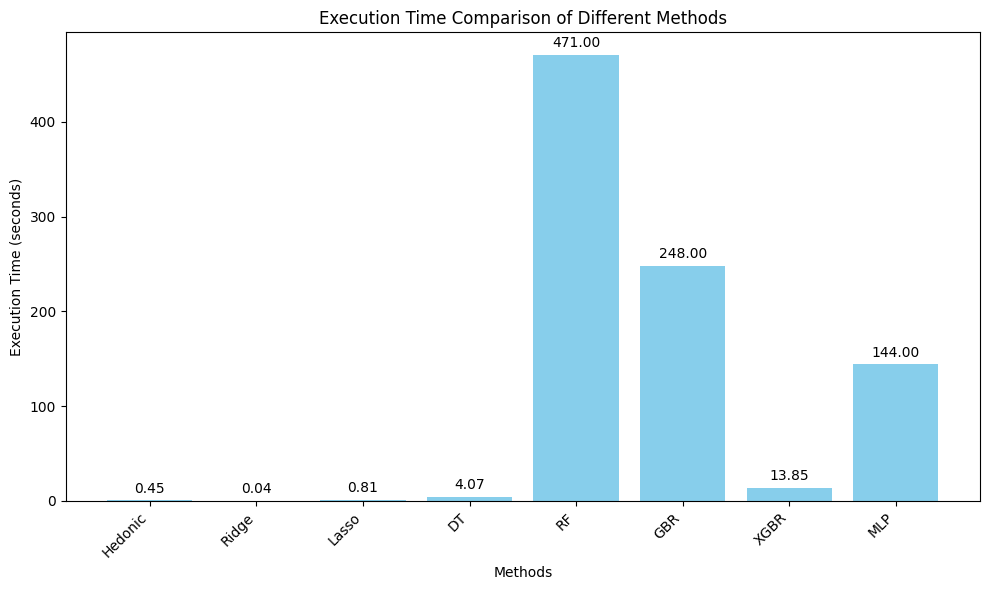

In [1]:
import matplotlib.pyplot as plt

# Method names
methods = ["Hedonic", "Ridge", "Lasso", "DT", "RF", "GBR", "XGBR", "MLP"]

# Execution time in seconds
execution_time = [0.45, 0.04, 0.81, 4.07, 471, 248, 13.85, 144]

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(methods, execution_time, color='skyblue')
plt.xlabel('Methods')
plt.ylabel('Execution Time (seconds)')
plt.title('Execution Time Comparison of Different Methods')
plt.xticks(rotation=45, ha='right')

# Add labels with values on top of bars
for i, v in enumerate(execution_time):
    plt.text(i, v + 5, f'{v:.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()


从21个分类变成10个分类。

In [186]:
beijing_dtypes_sorted = beijing.dtypes.sort_values()
print(beijing_dtypes_sorted)

livingRoom_Length        int64
district                 int64
Cid                      int64
price                    int64
livingRoom               int64
kitchen                  int64
buildingStructure        int64
renovationCondition      int64
subway                 float64
fiveYearsProperty      float64
elevator               float64
ladderRatio            float64
Lng                    float64
communityAverage       float64
square                 float64
totalPrice             float64
Lat                    float64
buildingType           float64
constructionTime        object
bathRoom                object
drawingRoom             object
tradeTime               object
floor                   object
dtype: object


### bathRoom

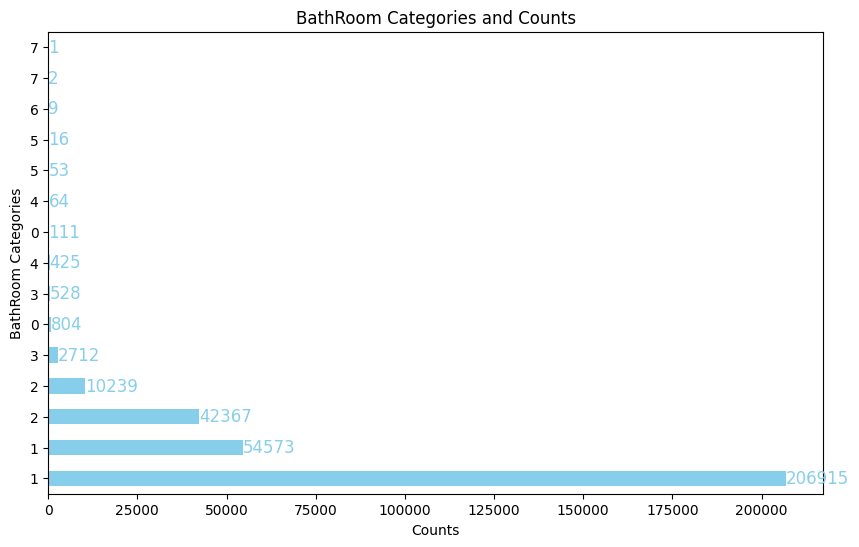

In [187]:
import pandas as pd
import matplotlib.pyplot as plt

# 获取'bathRoom'列的不同类别和其对应的数量
bathRoom_categories = beijing['bathRoom'].value_counts()

# 创建横向柱状图
plt.figure(figsize=(10, 6))  # 设置图形大小

# 绘制横向柱状图
ax = bathRoom_categories.plot(kind='barh', color='skyblue')

# 添加数量标签，颜色和柱子一样
for i, v in enumerate(bathRoom_categories):
    ax.text(v, i, str(v), color='skyblue', va='center', fontsize=12)

# 添加标题和标签
plt.title('BathRoom Categories and Counts')
plt.xlabel('Counts')
plt.ylabel('BathRoom Categories')

# 显示图形
plt.show()

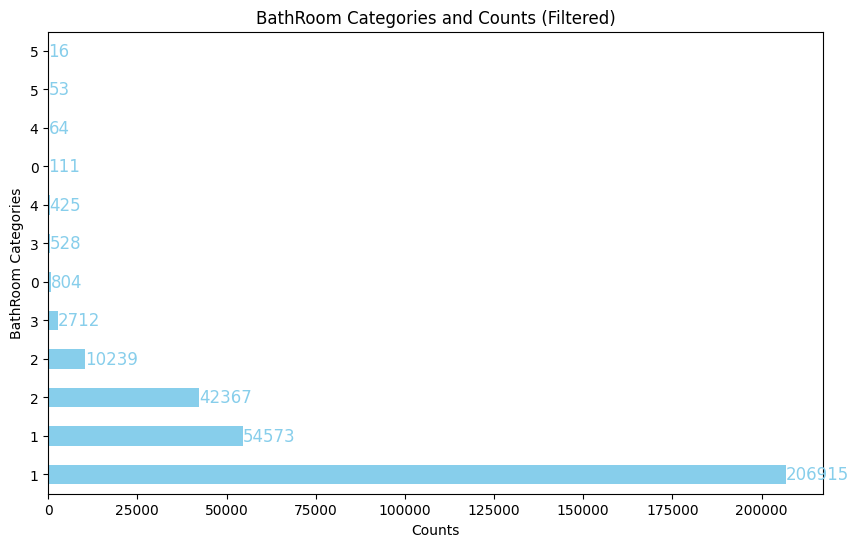

In [188]:
import pandas as pd
import matplotlib.pyplot as plt

# 删除'bathRoom'列中数据条目小于10的数据项
min_category_count = 10
bathRoom_counts = beijing['bathRoom'].value_counts()
categories_to_keep = bathRoom_counts[bathRoom_counts >= min_category_count].index.tolist()
beijing_filtered = beijing[beijing['bathRoom'].isin(categories_to_keep)]

# 获取过滤后的'bathRoom'列的不同类别和其对应的数量
bathRoom_categories_filtered = beijing_filtered['bathRoom'].value_counts()

# 创建横向柱状图
plt.figure(figsize=(10, 6))  # 设置图形大小

# 绘制横向柱状图
ax = bathRoom_categories_filtered.plot(kind='barh', color='skyblue')

# 添加数量标签，颜色和柱子一样
for i, v in enumerate(bathRoom_categories_filtered):
    ax.text(v, i, str(v), color='skyblue', va='center', fontsize=12)

# 添加标题和标签
plt.title('BathRoom Categories and Counts (Filtered)')
plt.xlabel('Counts')
plt.ylabel('BathRoom Categories')

# 显示图形
plt.show()


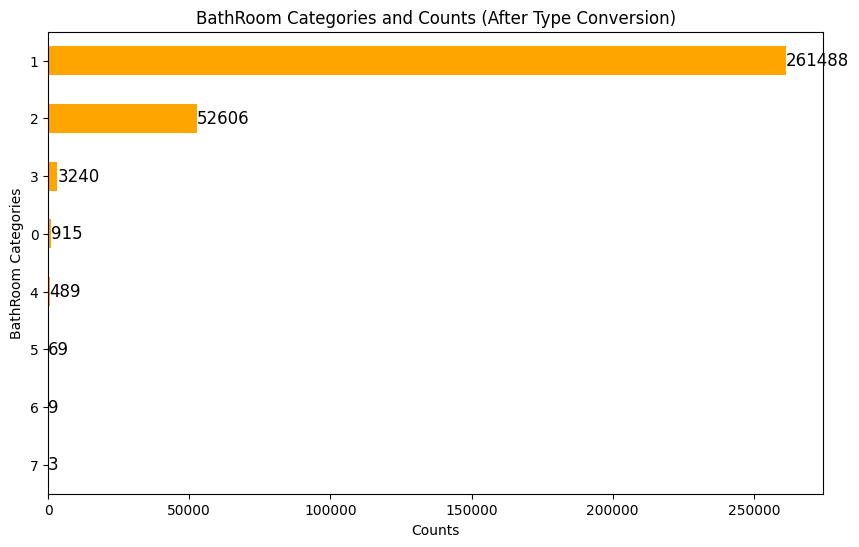

In [189]:
import pandas as pd
import matplotlib.pyplot as plt

# 将'bathRoom'字段从object类型转换为int64类型
beijing['bathRoom'] = beijing['bathRoom'].astype('int64')

# 计算bathRoom各类别的数量统计并按频次升序排序
bathRoom_counts = beijing['bathRoom'].value_counts().sort_values(ascending=True)

# 创建横向统计图
plt.figure(figsize=(10, 6))  # 设置图形大小

# 绘制横向统计图
ax = bathRoom_counts.plot(kind='barh', color='orange')

# 添加数量标签
for i, v in enumerate(bathRoom_counts):
    ax.text(v, i, str(v), color='black', va='center', fontsize=12)

# 添加标题和标签
plt.title('BathRoom Categories and Counts (After Type Conversion)')
plt.xlabel('Counts')
plt.ylabel('BathRoom Categories')

# 显示图形
plt.show()


In [190]:
beijing_dtypes_sorted = beijing.dtypes.sort_values()
print(beijing_dtypes_sorted)

livingRoom_Length        int64
district                 int64
Cid                      int64
price                    int64
livingRoom               int64
kitchen                  int64
bathRoom                 int64
buildingStructure        int64
renovationCondition      int64
subway                 float64
fiveYearsProperty      float64
elevator               float64
ladderRatio            float64
Lng                    float64
buildingType           float64
communityAverage       float64
square                 float64
totalPrice             float64
Lat                    float64
drawingRoom             object
tradeTime               object
constructionTime        object
floor                   object
dtype: object


### drawingRoom

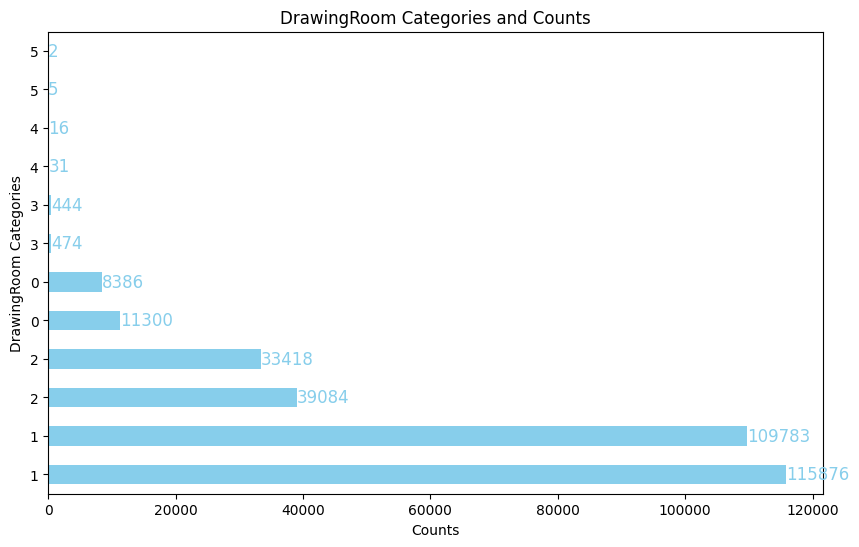

In [191]:
import pandas as pd
import matplotlib.pyplot as plt

# 获取'drawingRoom'列的不同类别和其对应的数量
drawingRoom_categories = beijing['drawingRoom'].value_counts()

# 创建横向柱状图
plt.figure(figsize=(10, 6))  # 设置图形大小

# 绘制横向柱状图
ax = drawingRoom_categories.plot(kind='barh', color='skyblue')

# 添加数量标签，颜色和柱子一样
for i, v in enumerate(drawingRoom_categories):
    ax.text(v, i, str(v), color='skyblue', va='center', fontsize=12)

# 添加标题和标签
plt.title('DrawingRoom Categories and Counts')
plt.xlabel('Counts')
plt.ylabel('DrawingRoom Categories')

# 显示图形
plt.show()


In [192]:
import pandas as pd

# 获取'drawingRoom'列的不同类别和其对应的数量
drawingRoom_categories = beijing['drawingRoom'].value_counts()

# 打印'drawingRoom'的分类和每类数量统计
print("\nDrawingRoom Categories and Their Counts (After Removal):")
print(drawingRoom_categories)



DrawingRoom Categories and Their Counts (After Removal):
1    115876
1    109783
2     39084
2     33418
0     11300
0      8386
3       474
3       444
4        31
4        16
5         5
5         2
Name: drawingRoom, dtype: int64


In [193]:
import pandas as pd

# 获取'drawingRoom'列的不同类别和其对应的数量
drawingRoom_categories = beijing['drawingRoom'].value_counts()

# 打印'drawingRoom'的分类和每类数量统计
print("DrawingRoom Categories and Their Counts (Before Removal):")
print(drawingRoom_categories)

# 获取数量小于10的'drawingRoom'类别
drawingRoom_to_remove = drawingRoom_categories[drawingRoom_categories < 10].index.tolist()

# 统计要删除的数据的'drawingRoom'类别和对应的数量
removed_data_counts = beijing[beijing['drawingRoom'].isin(drawingRoom_to_remove)]['drawingRoom'].value_counts()

# 删除数量小于10的'drawingRoom'类别对应的数据条目
beijing = beijing[~beijing['drawingRoom'].isin(drawingRoom_to_remove)]

# 打印删除后'drawingRoom'的分类和每类数量统计
print("\nDrawingRoom Categories and Their Counts (After Removal):")
print(beijing['drawingRoom'].value_counts())

# 打印被删除的数据的'drawingRoom'类别和对应的数量
print("\nRemoved Data Categories and Their Counts:")
print(removed_data_counts)

DrawingRoom Categories and Their Counts (Before Removal):
1    115876
1    109783
2     39084
2     33418
0     11300
0      8386
3       474
3       444
4        31
4        16
5         5
5         2
Name: drawingRoom, dtype: int64

DrawingRoom Categories and Their Counts (After Removal):
1    115876
1    109783
2     39084
2     33418
0     11300
0      8386
3       474
3       444
4        31
4        16
Name: drawingRoom, dtype: int64

Removed Data Categories and Their Counts:
5    5
5    2
Name: drawingRoom, dtype: int64


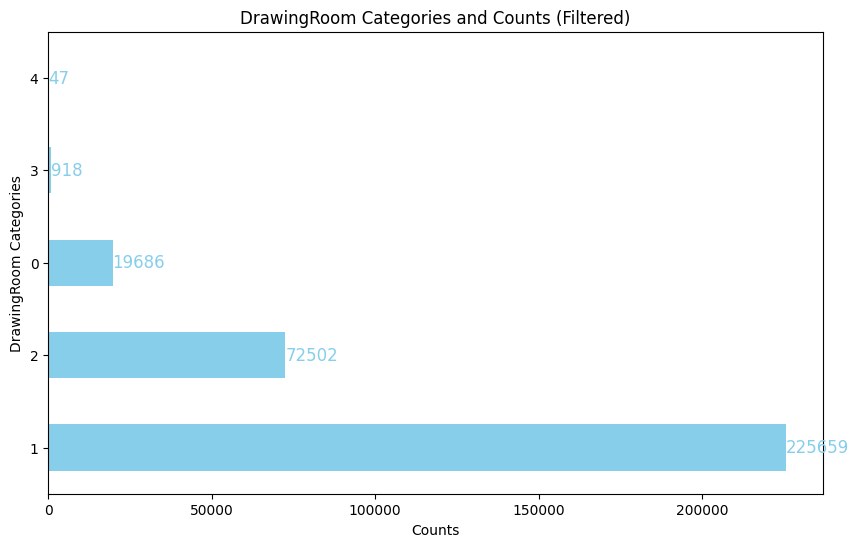

In [194]:
import pandas as pd
import matplotlib.pyplot as plt

beijing['drawingRoom'] = beijing['drawingRoom'].astype('int64')

# 获取'drawingRoom'列的不同类别和其对应的数量
drawingRoom_counts = beijing['drawingRoom'].value_counts()

# 创建横向柱状图
plt.figure(figsize=(10, 6))  # 设置图形大小

# 绘制横向柱状图
ax = drawingRoom_counts.plot(kind='barh', color='skyblue')

# 添加数量标签，颜色和柱子一样
for i, v in enumerate(drawingRoom_counts):
    ax.text(v, i, str(v), color='skyblue', va='center', fontsize=12)

# 添加标题和标签
plt.title('DrawingRoom Categories and Counts (Filtered)')
plt.xlabel('Counts')
plt.ylabel('DrawingRoom Categories')

# 显示图形
plt.show()


In [195]:
beijing_dtypes_sorted = beijing.dtypes.sort_values()
print(beijing_dtypes_sorted)

livingRoom_Length        int64
district                 int64
Cid                      int64
price                    int64
livingRoom               int64
drawingRoom              int64
kitchen                  int64
bathRoom                 int64
buildingStructure        int64
renovationCondition      int64
subway                 float64
fiveYearsProperty      float64
elevator               float64
ladderRatio            float64
Lng                    float64
buildingType           float64
communityAverage       float64
square                 float64
totalPrice             float64
Lat                    float64
tradeTime               object
constructionTime        object
floor                   object
dtype: object


### ConstructionTime

In [196]:
import pandas as pd

# 获取'constructionTime'列的唯一值
constructionTime_categories = beijing['constructionTime'].unique()

# 打印唯一值
print("Unique constructionTime categories:")
for i in range(0, len(constructionTime_categories), batch_size):
    batch = constructionTime_categories[i:i+batch_size]
    print(" ".join(batch))



Unique constructionTime categories:
2005 2004 2008 1960 1997 2009 2006 1991 2001 1990 2011 2000 1998 2010 1996
1993 2002 未知 2012 1989 2003 2007 1994 1984 1992 2014 1985 2013 1999 1979
1981 1976 1982 1975 1983 1986 1995 1965 1988 1987 2015 1955 1980 1978 1958
1970 1956 1977 1964 1963 1967 2016 1974 1973 1959 1954 1962 1966 1957 1944
1972 1971 1953 1968 1961 1950 1952 1933 1969 1906 1934 1914


In [197]:
# 计算并打印ConstructionTime长度及其计数
beijing['ConstructionTime_Length'] = beijing['constructionTime'].apply(lambda x: len(str(x)))
length_counts = beijing['ConstructionTime_Length'].value_counts()

# 计算每个长度占整个数据数量的百分比并添加到length_counts中
total_data_count = len(beijing)
percentage_counts = (length_counts / total_data_count) * 100
length_counts = pd.concat([length_counts, percentage_counts], axis=1)
length_counts.columns = ['Counts', 'Percentage']

print("\nConstructionTime value lengths and their counts:")
print(length_counts)



ConstructionTime value lengths and their counts:
   Counts  Percentage
4  299530   93.951922
2   19282    6.048078


对于ConstructionTime来说，缺失值是长度为1和长度为4的数据条目。其中长度为1的数据条目很少，可以直接删除，并且这部分值与drawingRoom里面被删去的异常值属于同一条目，可以认为是毫无意义的数据条目。
而对于存在的中文缺失值（意义为“未知”），由于数量庞大，占整个数据集的6%如果就这样删去非常可惜。因此需要进一步进行处理。

在这里首先尝试数据填充。先将ConstructionTime中长度为2的值赋值为空，并根据Cid将相同Cid的ConstructionTime值赋值过去。

In [198]:
batch_size = 15


# 将长度为2的值赋值为空字符串
beijing['constructionTime'] = beijing['constructionTime'].apply(lambda x: '' if len(str(x)) == 2 else x)

# 使用groupby和transform将相同Cid的constructionTime填充为相同值
beijing['constructionTime'] = beijing.groupby('Cid')['constructionTime'].transform('max')


import pandas as pd

# 获取'constructionTime'列的唯一值
constructionTime_categories = beijing['constructionTime'].unique()

# 打印唯一值
print("Unique constructionTime categories:")
for i in range(0, len(constructionTime_categories), batch_size):
    batch = constructionTime_categories[i:i+batch_size]
    print(" ".join(batch))
    
# 计算并打印ConstructionTime长度及其计数
beijing['ConstructionTime_Length'] = beijing['constructionTime'].apply(lambda x: len(str(x)))
length_counts = beijing['ConstructionTime_Length'].value_counts()

# 计算每个长度占整个数据数量的百分比并添加到length_counts中
total_data_count = len(beijing)
percentage_counts = (length_counts / total_data_count) * 100
length_counts = pd.concat([length_counts, percentage_counts], axis=1)
length_counts.columns = ['Counts', 'Percentage']

print("\nConstructionTime value lengths and their counts:")
print(length_counts)

Unique constructionTime categories:
2005 2004 2009 2008 1960 1997 2010 2006 1998 2002 2000 2011 2012 1996 2001
2014 2007 1992 1994 2003 1985 1993 1989 1999 2013 2015 1995 1984 1990 1988
2016 1986 1979 1991 1987 1982 1980  1981 1957 1983 1977 1976 1966 1973
1944 1975 1970 1974 1958 1964 1978 1955 1972 1965 1953 1956 1963 1962 1967
1954 1961 1959 1971 1950 1934 1914

ConstructionTime value lengths and their counts:
   Counts  Percentage
4  318357   99.857283
0     455    0.142717


填充的结果出乎意料得好。19282条数据中，除了占比0.14%的455条数据未匹配到constructionTime数据外，剩下数据全都匹配到了正确得constructionTime。对于这455条少量数据，本实验中选择直接删去。

In [199]:

# 将空字符串替换为NaN
beijing['constructionTime'].replace('', pd.NA, inplace=True)

# 删除ConstructionTime列中值为空的行
beijing.dropna(subset=['constructionTime'], inplace=True)

# 计算并打印ConstructionTime长度及其计数
beijing['ConstructionTime_Length'] = beijing['constructionTime'].apply(lambda x: len(str(x)))
length_counts = beijing['ConstructionTime_Length'].value_counts()

# 计算每个长度占整个数据数量的百分比并添加到length_counts中
total_data_count = len(beijing)
percentage_counts = (length_counts / total_data_count) * 100
length_counts = pd.concat([length_counts, percentage_counts], axis=1)
length_counts.columns = ['Counts', 'Percentage']

print("\nConstructionTime value lengths and their counts (with Percentage):")
print(length_counts)


ConstructionTime value lengths and their counts (with Percentage):
   Counts  Percentage
4  318357       100.0


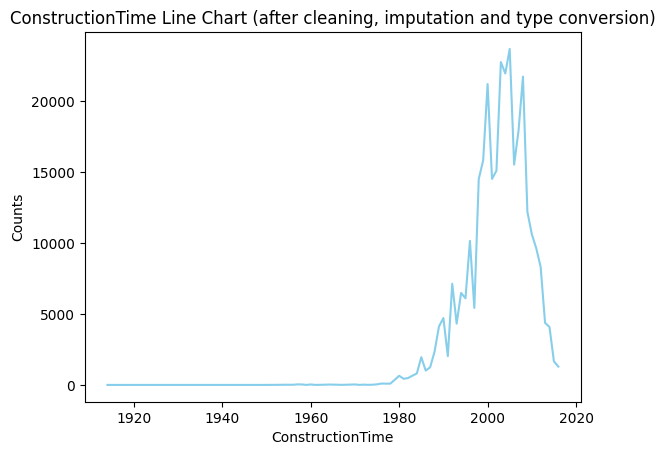

In [200]:
beijing['constructionTime'] = beijing['constructionTime'].astype('int64')

# 绘制折线图
beijing['constructionTime'].value_counts().sort_index().plot(kind='line', color='skyblue')

# 添加标题和标签
plt.title('ConstructionTime Line Chart (after cleaning, imputation and type conversion)')
plt.xlabel('ConstructionTime')
plt.ylabel('Counts')

# 显示图形
plt.show()
plt.show()

In [201]:
beijing_dtypes_sorted = beijing.dtypes.sort_values()
print(beijing_dtypes_sorted)

ConstructionTime_Length      int64
Cid                          int64
district                     int64
price                        int64
livingRoom                   int64
drawingRoom                  int64
kitchen                      int64
bathRoom                     int64
livingRoom_Length            int64
constructionTime             int64
renovationCondition          int64
buildingStructure            int64
communityAverage           float64
subway                     float64
fiveYearsProperty          float64
elevator                   float64
Lng                        float64
buildingType               float64
square                     float64
totalPrice                 float64
Lat                        float64
ladderRatio                float64
tradeTime                   object
floor                       object
dtype: object


### floor

In [202]:
import pandas as pd

floor_categories = beijing['floor'].unique()

print("Unique floor categories:")
for i in range(0, len(floor_categories), batch_size):
    batch = floor_categories[i:i+batch_size]
    print(" ".join(batch))

beijing['Floor_Length'] = beijing['floor'].apply(lambda x: len(str(x)))
length_counts = beijing['Floor_Length'].value_counts()

print("\nFloor value lengths and their counts:")
print(length_counts)


Unique floor categories:
高 26 高 22 中 4 底 21 中 6 中 8 高 6 高 10 中 23 底 11 底 3 高 24 低 23 中 19 高 18
低 25 中 12 中 14 中 30 中 27 中 5 低 18 底 28 中 11 低 9 顶 7 顶 27 低 6 中 17 顶 6
中 24 中 15 底 5 中 29 顶 19 顶 5 中 9 低 22 顶 18 低 16 高 13 高 9 高 17 底 6 中 28
低 26 底 15 高 16 底 2 低 7 中 13 低 33 底 14 高 15 底 4 顶 11 中 32 顶 16 底 18 顶 17
低 14 低 10 底 20 高 12 低 31 低 30 低 19 低 12 中 10 中 16 顶 20 底 19 中 31 低 13 底 10
高 25 中 21 中 20 高 20 低 21 低 24 顶 4 高 21 高 7 中 22 底 1 中 7 底 8 顶 15 中 18
高 28 顶 14 顶 13 低 20 底 26 低 17 顶 24 底 23 顶 3 顶 21 底 24 高 30 高 11 底 25 高 27
底 9 低 11 低 28 低 15 顶 26 低 34 顶 12 中 25 高 8 底 17 高 32 高 19 底 7 顶 28 顶 9
高 31 中 26 顶 8 底 32 中 42 底 30 低 32 底 16 低 3 底 22 高 14 高 23 底 27 底 13 低 27
顶 23 低 29 顶 22 高 29 中 34 顶 25 高 34 顶 10 低 37 底 12 未知 6 顶 32 低 42 顶 30 底 33
高 42 低 8 高 33 中 33 顶 2 顶 29 底 29 未知 15 高 37 低 36 低 35 顶 34 高 36 中 37 中 35
底 31 未知 12 顶 31 低 63 未知 21 底 34 中 57 顶 33 未知 11 未知 7 未知 10 未知 18 未知 8 未知 14 未知 4
未知 5 未知 3 未知 27 未知 25 未知 20 未知 26 未知 9 未知 22 未知 23 未知 16 未知 19 未知 28 中 36 未知 17 未知 13
低 2 未知 29 未知 2

In [203]:
# 将 "floor" 列拆分为两列
beijing[['floor_type', 'floor_number']] = beijing['floor'].str.split(' ', expand=True)

In [204]:
# 计算楼层类型的数量统计
floor_type_counts = beijing['floor_type'].value_counts()

# 计算每个楼层类型占整个数据数量的百分比并添加到floor_type_counts中
total_data_count = len(beijing)
percentage_counts = (floor_type_counts / total_data_count) * 100
floor_type_counts = pd.concat([floor_type_counts, percentage_counts], axis=1)
floor_type_counts.columns = ['Counts', 'Percentage']

print("\nFloor type counts (with Percentage):")
print(floor_type_counts)

# Total number of distinct floor types:
print("Total number of distinct floor types:", len(floor_type_counts))


Floor type counts (with Percentage):
    Counts  Percentage
中   119718   37.604953
高    70046   22.002343
低    64097   20.133686
顶    37356   11.733997
底    25874    8.127354
未知    1266    0.397667
Total number of distinct floor types: 6


In [205]:
# 计算楼层号码的数量统计
floor_number_counts = beijing['floor_number'].value_counts()

# 计算每个楼层号码占整个数据数量的百分比并添加到 floor_number_counts 中
total_data_count = len(beijing)
percentage_counts = (floor_number_counts / total_data_count) * 100
floor_number_counts = pd.concat([floor_number_counts, percentage_counts], axis=1)
floor_number_counts.columns = ['Counts', 'Percentage']

print("Floor number counts (with Percentage):")
print(floor_number_counts)

# Total number of distinct floor types:
print("Total number of distinct floor types:", len(floor_number_counts))

Floor number counts (with Percentage):
    Counts  Percentage
6   107652   33.814868
18   22989    7.221139
16   15998    5.025176
24   13594    4.270049
5    13437    4.220733
20   10025    3.148981
7     9948    3.124794
11    9641    3.028361
22    9228    2.898633
12    9101    2.858740
21    9016    2.832041
14    8824    2.771731
28    7449    2.339826
15    7283    2.287683
9     7107    2.232399
26    6886    2.162981
25    6403    2.011264
10    5705    1.792013
17    5224    1.640925
27    4853    1.524389
19    4720    1.482612
13    4311    1.354140
23    3539    1.111645
4     3013    0.946422
32    2477    0.778057
30    2472    0.776487
8     2342    0.735652
29    1830    0.574826
3     1076    0.337985
31     670    0.210456
33     571    0.179358
34     555    0.174333
1      181    0.056854
2      168    0.052771
42      34    0.010680
37      16    0.005026
36      12    0.003769
35       4    0.001256
57       2    0.000628
63       1    0.000314
Total number of di

把中，高，低，顶，底转换成对应的英文，并且把位置的1266条数据从beijing里删去。

In [206]:
# 定义中文到英文的映射
floor_mapping = {
    '中': 'Middle',
    '高': 'High',
    '低': 'Low',
    '顶': 'Top',
    '底': 'Bottom',
    '未知': 'Unknown'
}

# 将中文楼层类型映射为英文
beijing['floor_type'] = beijing['floor_type'].map(floor_mapping)

In [207]:
# 计算楼层类型的数量统计
floor_type_counts = beijing['floor_type'].value_counts()

# 计算每个楼层类型占整个数据数量的百分比并添加到floor_type_counts中
total_data_count = len(beijing)
percentage_counts = (floor_type_counts / total_data_count) * 100
floor_type_counts = pd.concat([floor_type_counts, percentage_counts], axis=1)
floor_type_counts.columns = ['Counts', 'Percentage']

print("\nFloor type counts (with Percentage):")
print(floor_type_counts)


Floor type counts (with Percentage):
         Counts  Percentage
Middle   119718   37.604953
High      70046   22.002343
Low       64097   20.133686
Top       37356   11.733997
Bottom    25874    8.127354
Unknown    1266    0.397667


In [208]:
# 删除值为"Unknown"的行
beijing = beijing[beijing['floor_type'] != 'Unknown']

# 计算楼层类型的数量统计
floor_type_counts = beijing['floor_type'].value_counts()

# 计算每个楼层类型占整个数据数量的百分比并添加到floor_type_counts中
total_data_count = len(beijing)
percentage_counts = (floor_type_counts / total_data_count) * 100
floor_type_counts = pd.concat([floor_type_counts, percentage_counts], axis=1)
floor_type_counts.columns = ['Counts', 'Percentage']

print("Floor type counts (with Percentage) after removing 'Unknown' values:")
print(floor_type_counts)


Floor type counts (with Percentage) after removing 'Unknown' values:
        Counts  Percentage
Middle  119718   37.755092
High     70046   22.090189
Low      64097   20.214071
Top      37356   11.780845
Bottom   25874    8.159803


In [209]:
# 按楼层类型分组并计算每个组的 floor_number 最大值和最小值
floor_number_stats = beijing.groupby('floor_type')['floor_number'].agg(['min', 'max'])

print("Floor number statistics for different floor types:")
print(floor_number_stats)

Floor number statistics for different floor types:
           min max
floor_type        
Bottom       1   9
High        10   9
Low         10   9
Middle      10   9
Top         10   9


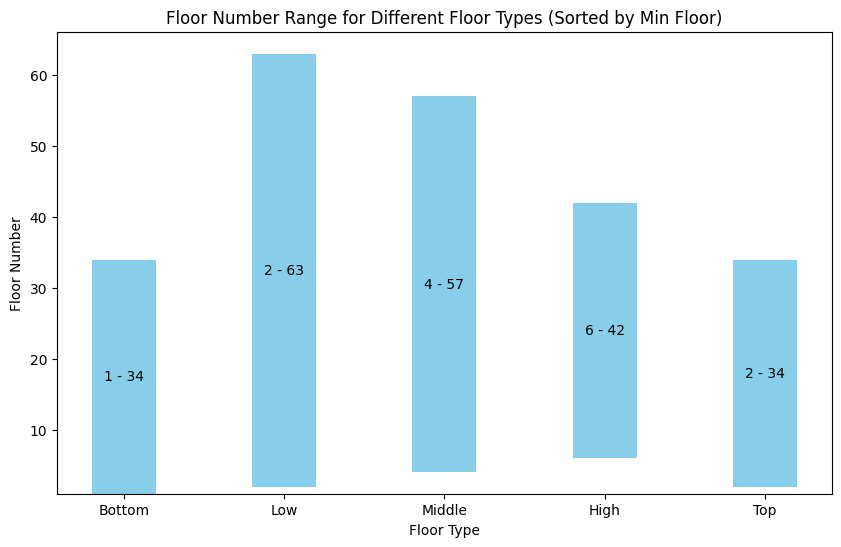

In [210]:
import matplotlib.pyplot as plt
import pandas as pd

# 示例数据帧
data = {'floor_type': ['Bottom', 'High', 'Low', 'Middle', 'Top'],
        'min_floor': [1, 6, 2, 4, 2],
        'max_floor': [34, 42, 63, 57, 34]}
floor_range_df = pd.DataFrame(data)

# 按照最小楼层的高低排序
floor_order = ['Bottom', 'Low', 'Middle', 'High', 'Top']
floor_range_df['floor_type'] = pd.Categorical(floor_range_df['floor_type'], categories=floor_order, ordered=True)
floor_range_df = floor_range_df.sort_values(by='floor_type')

# 创建柱状图
plt.figure(figsize=(10, 6))

# 设置柱子的宽度
bar_width = 0.4

# 绘制最大值和最小值的柱状图，同时显示数字
for index, row in floor_range_df.iterrows():
    center = (row['max_floor'] + row['min_floor']) / 2
    plt.bar(row['floor_type'], row['max_floor'] - row['min_floor'], bottom=row['min_floor'], color='skyblue', width=bar_width)
    plt.text(row['floor_type'], center, f"{row['min_floor']} - {row['max_floor']}", ha='center', va='center', fontsize=10)

# 添加标签和标题
plt.xlabel('Floor Type')
plt.ylabel('Floor Number')
plt.title('Floor Number Range for Different Floor Types (Sorted by Min Floor)')

# 显示图形
plt.show()


可以看到floor_type没有意义，并不能反应真实的情况。而且基于有floor_numder的存在，可以代替floor_type的功能。因此，将floor_type这一列删去。

In [211]:
beijing.drop(['floor_type','floor'], axis=1, inplace=True)

In [212]:
# 计算楼层号码的数量统计
floor_number_counts = beijing['floor_number'].value_counts()

# 计算每个楼层号码占整个数据数量的百分比并添加到 floor_number_counts 中
total_data_count = len(beijing)
percentage_counts = (floor_number_counts / total_data_count) * 100
floor_number_counts = pd.concat([floor_number_counts, percentage_counts], axis=1)
floor_number_counts.columns = ['Counts', 'Percentage']

print("Floor number counts (with Percentage) after removing 'Unknown' values:")
print(floor_number_counts)

Floor number counts (with Percentage) after removing 'Unknown' values:
    Counts  Percentage
6   107391   33.867565
18   22942    7.235147
16   15947    5.029156
24   13585    4.284259
5    13346    4.208886
20    9973    3.145154
7     9885    3.117402
11    9596    3.026261
22    9209    2.904214
12    9019    2.844294
21    8988    2.834518
14    8767    2.764821
28    7409    2.336553
15    7264    2.290825
9     7090    2.235951
26    6860    2.163417
25    6345    2.001003
10    5646    1.780561
17    5201    1.640223
27    4828    1.522591
19    4702    1.482855
13    4306    1.357970
23    3482    1.098107
4     2996    0.944839
32    2477    0.781164
30    2459    0.775487
8     2295    0.723767
29    1828    0.576491
3     1072    0.338073
31     639    0.201519
33     571    0.180074
34     555    0.175029
1      181    0.057081
2      168    0.052982
42      34    0.010722
37      16    0.005046
36      12    0.003784
35       4    0.001261
57       2    0.000631
63       

In [213]:
# 检查 'floor_number' 列是否存在缺失值
floor_number_missing = beijing['floor_number'].isna().sum()

# 打印 'floor_number' 列的缺失值数量
print("Missing values in 'floor_number' column:", floor_number_missing)


Missing values in 'floor_number' column: 0


In [214]:
# 删除 'floor_number' 列中含有缺失值的行
beijing = beijing.dropna(subset=['floor_number'])

# 打印删除缺失值后的数据集的形状，以确认缺失值是否已被删除
print("Shape of the DataFrame after removing rows with missing 'floor_number':", beijing.shape)

# 将 'floor_number' 字段从对象类型转换为整数类型
beijing['floor_number'] = beijing['floor_number'].astype('int64')

Shape of the DataFrame after removing rows with missing 'floor_number': (317091, 25)


In [215]:
# 检查 DataFrame 中是否存在缺失值
missing_values = beijing.isna().sum()

# 打印各列的缺失值数量
print("Missing values in each column:")
print(missing_values)


Missing values in each column:
Lng                           0
Lat                           0
Cid                           0
tradeTime                     0
totalPrice                    0
price                         0
square                        0
livingRoom                    0
drawingRoom                   0
kitchen                       0
bathRoom                      0
buildingType               1814
constructionTime              0
renovationCondition           0
buildingStructure             0
ladderRatio                   0
elevator                      0
fiveYearsProperty             0
subway                        0
district                      0
communityAverage            304
livingRoom_Length             0
ConstructionTime_Length       0
Floor_Length                  0
floor_number                  0
dtype: int64


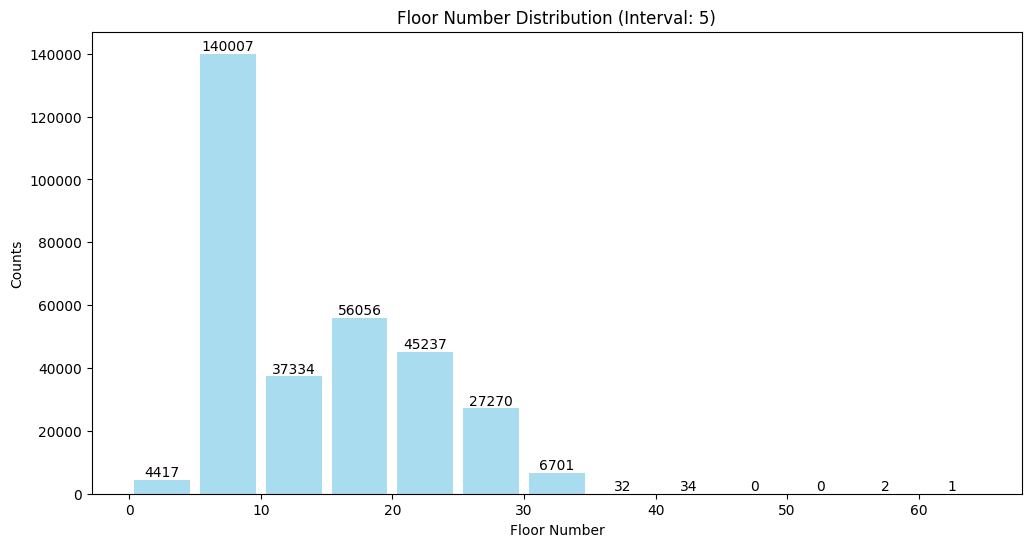

In [216]:
import matplotlib.pyplot as plt

# 设置图形大小
plt.figure(figsize=(12, 6))

# 绘制直方图
counts, bins, patches = plt.hist(beijing['floor_number'], bins=range(0, max(beijing['floor_number']) + 5, 5), color='skyblue', alpha=0.7, rwidth=0.85)

# 添加频次标签
for count, bin, patch in zip(counts, bins, patches):
    plt.text(bin + 2.5, count, str(int(count)), ha='center', va='bottom', fontsize=10)

# 添加标题和标签
plt.title('Floor Number Distribution (Interval: 5)')
plt.xlabel('Floor Number')
plt.ylabel('Counts')

# 显示图形
plt.show()


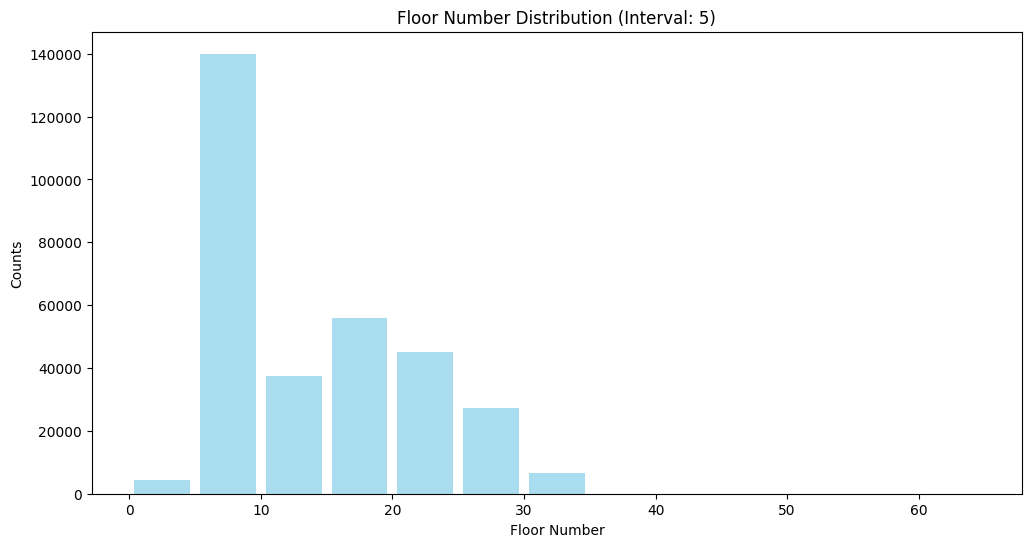

In [217]:
import matplotlib.pyplot as plt

# 设置图形大小
plt.figure(figsize=(12, 6))

# 绘制直方图
plt.hist(beijing['floor_number'], bins=range(0, max(beijing['floor_number']) + 5, 5), color='skyblue', alpha=0.7, rwidth=0.85)

# 添加标题和标签
plt.title('Floor Number Distribution (Interval: 5)')
plt.xlabel('Floor Number')
plt.ylabel('Counts')

# 显示图形
plt.show()


In [218]:
beijing_dtypes_sorted = beijing.dtypes.sort_values()
print(beijing_dtypes_sorted)

constructionTime             int64
ConstructionTime_Length      int64
livingRoom_Length            int64
district                     int64
buildingStructure            int64
renovationCondition          int64
Floor_Length                 int64
bathRoom                     int64
kitchen                      int64
floor_number                 int64
livingRoom                   int64
price                        int64
Cid                          int64
drawingRoom                  int64
buildingType               float64
square                     float64
totalPrice                 float64
ladderRatio                float64
elevator                   float64
fiveYearsProperty          float64
subway                     float64
communityAverage           float64
Lat                        float64
Lng                        float64
tradeTime                   object
dtype: object


In [219]:
beijing['tradeTime'].head()

0    2016-08-09
1    2016-07-28
2    2016-12-11
3    2016-09-30
4    2016-08-28
Name: tradeTime, dtype: object

In [220]:
# 拆分日期并创建新的列
beijing['tradeYear'] = beijing['tradeTime'].str.split('-').str.get(0).astype(int)
beijing['tradeMonth'] = beijing['tradeTime'].str.split('-').str.get(1).astype(int)
beijing['tradeDay'] = beijing['tradeTime'].str.split('-').str.get(2).astype(int)

In [221]:
beijing.drop(["tradeTime"],axis=1, inplace=True)

In [222]:
beijing.drop(["ConstructionTime_Length","Floor_Length","livingRoom_Length"],axis=1, inplace=True)

In [223]:
beijing_dtypes_sorted = beijing.dtypes.sort_values()
print(beijing_dtypes_sorted)

tradeDay                 int32
tradeYear                int32
tradeMonth               int32
floor_number             int64
district                 int64
buildingStructure        int64
renovationCondition      int64
bathRoom                 int64
constructionTime         int64
drawingRoom              int64
livingRoom               int64
price                    int64
Cid                      int64
kitchen                  int64
buildingType           float64
square                 float64
ladderRatio            float64
elevator               float64
fiveYearsProperty      float64
subway                 float64
totalPrice             float64
communityAverage       float64
Lat                    float64
Lng                    float64
dtype: object


In [224]:
beijing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 317091 entries, 0 to 318850
Data columns (total 24 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Lng                  317091 non-null  float64
 1   Lat                  317091 non-null  float64
 2   Cid                  317091 non-null  int64  
 3   totalPrice           317091 non-null  float64
 4   price                317091 non-null  int64  
 5   square               317091 non-null  float64
 6   livingRoom           317091 non-null  int64  
 7   drawingRoom          317091 non-null  int64  
 8   kitchen              317091 non-null  int64  
 9   bathRoom             317091 non-null  int64  
 10  buildingType         315277 non-null  float64
 11  constructionTime     317091 non-null  int64  
 12  renovationCondition  317091 non-null  int64  
 13  buildingStructure    317091 non-null  int64  
 14  ladderRatio          317091 non-null  float64
 15  elevator         

## Missing Value

In [225]:
beijing.head()

,Lng,Lat,Cid,totalPrice,price,square,livingRoom,drawingRoom,kitchen,bathRoom,...,ladderRatio,elevator,fiveYearsProperty,subway,district,communityAverage,floor_number,tradeYear,tradeMonth,tradeDay
0,116.475489,40.019520,1111027376244,415.0,31680,131.00,2,1,1,1,...,0.217,1.0,0.0,1.0,7,56021.0,26,2016,8,9
1,116.453917,39.881534,1111027381879,575.0,43436,132.38,2,2,1,2,...,0.667,1.0,1.0,0.0,7,71539.0,22,2016,7,28
2,116.561978,39.877145,1111040862969,1030.0,52021,198.00,3,2,1,3,...,0.500,1.0,0.0,0.0,7,48160.0,4,2016,12,11
3,116.438010,40.076114,1111043185817,297.5,22202,134.00,3,1,1,1,...,0.273,1.0,0.0,0.0,6,51238.0,21,2016,9,30
4,116.428392,39.886229,1111027381174,392.0,48396,81.00,2,1,1,1,...,0.333,0.0,1.0,1.0,1,62588.0,6,2016,8,28


进行完特征类型转换后，数据集中的所有元素都是数值类型。下一步是缺失值处理。通过isnull().sum()函数可一看到

In [226]:
# 计算每列的缺失值数量
missing_values = beijing.isnull().sum()

# 计算每列的缺失值占总数据数量的百分比
missing_percentage = (missing_values / len(beijing)) * 100

# 创建包含缺失值数量和百分比的 DataFrame
missing_info = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage})

# 显示结果
print(missing_info)


                     Missing Values  Percentage
Lng                               0    0.000000
Lat                               0    0.000000
Cid                               0    0.000000
totalPrice                        0    0.000000
price                             0    0.000000
square                            0    0.000000
livingRoom                        0    0.000000
drawingRoom                       0    0.000000
kitchen                           0    0.000000
bathRoom                          0    0.000000
buildingType                   1814    0.572076
constructionTime                  0    0.000000
renovationCondition               0    0.000000
buildingStructure                 0    0.000000
ladderRatio                       0    0.000000
elevator                          0    0.000000
fiveYearsProperty                 0    0.000000
subway                            0    0.000000
district                          0    0.000000
communityAverage                304    0

在此可以看到，DOM的缺失值高达156923条，比例约为清洗后的数据集的一半。在此，如果鲁莽地对其进行插值，如有不慎，将会对结果会带来很大的灾难。此外，考虑到DOM的意义是房屋从展示到链家交易平台到被卖出之间的天数间隔，与房屋本身的属性无关，保留这样的数据会影响本实验的研究方向。因此，决定将DOM这一列删去。同样因为与房屋属性无关而被删去的还有followers这一列。对于communityAverage和buildingType，本实验中以其数据量小，分别为1814条和304条，占比0.5%和0.09%为由，直接删去缺失的数据条目。

In [227]:
beijing.dropna(subset=['buildingType'], inplace=True)

In [228]:
# 计算每列的缺失值数量
missing_values = beijing.isnull().sum()

# 计算每列的缺失值占总数据数量的百分比
missing_percentage = (missing_values / len(beijing)) * 100

# 创建包含缺失值数量和百分比的 DataFrame
missing_info = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage})

# 显示结果
print(missing_info)

                     Missing Values  Percentage
Lng                               0    0.000000
Lat                               0    0.000000
Cid                               0    0.000000
totalPrice                        0    0.000000
price                             0    0.000000
square                            0    0.000000
livingRoom                        0    0.000000
drawingRoom                       0    0.000000
kitchen                           0    0.000000
bathRoom                          0    0.000000
buildingType                      0    0.000000
constructionTime                  0    0.000000
renovationCondition               0    0.000000
buildingStructure                 0    0.000000
ladderRatio                       0    0.000000
elevator                          0    0.000000
fiveYearsProperty                 0    0.000000
subway                            0    0.000000
district                          0    0.000000
communityAverage                297    0

目前，特征可以分为以下几大类。
位置：Lng Lat
房屋属性：price square livingRoom drawingRoom kitchen bathRoom buildingType constructionTime renovationCondition buildingStructure ladderRatio elevator  fiveYearsProperty floor_number district communityAverage Cid
周围设施属性：subway  
时间属性：tradeYear tradeMonth tradeDay


按类型分，可以分为连续性和分类型。
分类型有：district livingRoom drawingRoom kitchen bathRoom buildingType elevator fiveYearsProperty subway tradeYear tradeMonth tradeDay Cid buildingStructure
连续型有：Lng Lat price square constructionTime ladderRatio floor_number communityAverage 

此外，丢弃掉了Cid和price以及CommunityAverage。

In [229]:
beijing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 315277 entries, 0 to 318850
Data columns (total 24 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Lng                  315277 non-null  float64
 1   Lat                  315277 non-null  float64
 2   Cid                  315277 non-null  int64  
 3   totalPrice           315277 non-null  float64
 4   price                315277 non-null  int64  
 5   square               315277 non-null  float64
 6   livingRoom           315277 non-null  int64  
 7   drawingRoom          315277 non-null  int64  
 8   kitchen              315277 non-null  int64  
 9   bathRoom             315277 non-null  int64  
 10  buildingType         315277 non-null  float64
 11  constructionTime     315277 non-null  int64  
 12  renovationCondition  315277 non-null  int64  
 13  buildingStructure    315277 non-null  int64  
 14  ladderRatio          315277 non-null  float64
 15  elevator         

## 4.4 EDA: Univariate Analysis

探索性数据分析（Exploratory Data Analysis，EDA）是数据分析的重要阶段，旨在深入了解数据、发现数据中的模式、趋势和异常，以及提取有用的信息。EDA包括以下主要组成部分：

数据总结：首先，对数据进行基本的总结性统计分析，包括计算均值、中位数、标准差、最小值、最大值等，以获得对数据分布的初步了解。

数据可视化：使用各种图表和可视化工具来呈现数据，包括直方图、箱线图、散点图、饼图等。可视化有助于发现数据的分布、关系和趋势，以及识别异常值。

缺失值和异常值处理：识别和处理数据中的缺失值和异常值，确保数据的质量和一致性。常见的处理方法包括删除、替换、插值等。

特征分析：探索数据集中的各个特征（变量）之间的关系，包括相关性分析、特征的分布、特征的重要性等。这有助于选择用于建模的最重要的特征。

探索性统计分析：应用统计方法来深入了解数据，包括探索性数据分析图、相关性矩阵、假设检验等。这有助于发现隐藏在数据中的模式和趋势。

数据转换和特征工程：对数据进行预处理，进行数据的标准化、归一化、编码分类变量、创建新特征等操作，以准备数据用于建模。

可解释性分析：对模型结果进行解释，了解模型中各个特征的贡献和影响，帮助做出有意义的决策。

可视化报告：生成可视化报告，以清晰地传达探索性分析的结果和发现，以及对数据的深入理解。

总之，EDA是数据分析的关键步骤，它有助于为后续的数据建模和分析工作提供有力的基础，帮助数据科学家更好地理解数据并制定相应的分析策略。

In [230]:
beijing.head()

,Lng,Lat,Cid,totalPrice,price,square,livingRoom,drawingRoom,kitchen,bathRoom,...,ladderRatio,elevator,fiveYearsProperty,subway,district,communityAverage,floor_number,tradeYear,tradeMonth,tradeDay
0,116.475489,40.019520,1111027376244,415.0,31680,131.00,2,1,1,1,...,0.217,1.0,0.0,1.0,7,56021.0,26,2016,8,9
1,116.453917,39.881534,1111027381879,575.0,43436,132.38,2,2,1,2,...,0.667,1.0,1.0,0.0,7,71539.0,22,2016,7,28
2,116.561978,39.877145,1111040862969,1030.0,52021,198.00,3,2,1,3,...,0.500,1.0,0.0,0.0,7,48160.0,4,2016,12,11
3,116.438010,40.076114,1111043185817,297.5,22202,134.00,3,1,1,1,...,0.273,1.0,0.0,0.0,6,51238.0,21,2016,9,30
4,116.428392,39.886229,1111027381174,392.0,48396,81.00,2,1,1,1,...,0.333,0.0,1.0,1.0,1,62588.0,6,2016,8,28


在处理了所有非数值型列之后，本节首先通过describe()函数对清洗后的数据集进行基本的统计分析。

 ### 4.4.1 Dependent Variable  (totalPrice)

In [231]:
beijing['totalPrice'].describe()

count    315277.000000
mean        347.678890
std         224.075538
min           0.100000
25%         205.000000
50%         293.500000
75%         425.000000
max        4900.000000
Name: totalPrice, dtype: float64

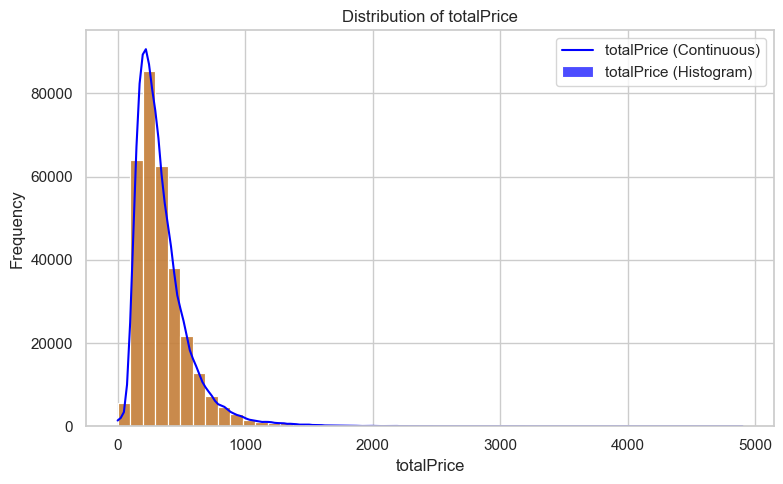

In [254]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.histplot(data=beijing, x='totalPrice', kde=True, bins=50, color='blue', alpha=0.7)
sns.histplot(data=beijing, x='totalPrice', bins=50, color='orange', alpha=0.7)
plt.title('Distribution of totalPrice')
plt.xlabel('totalPrice')
plt.ylabel('Frequency')
plt.legend(['totalPrice (Continuous)', 'totalPrice (Histogram)'])
plt.tight_layout()
plt.show()

 ### 4.4.2 Dependent Variable  (Numeric Features)

'square'、'constructionTime'、'ladderRatio'、'floor_number'和'communityAverage'

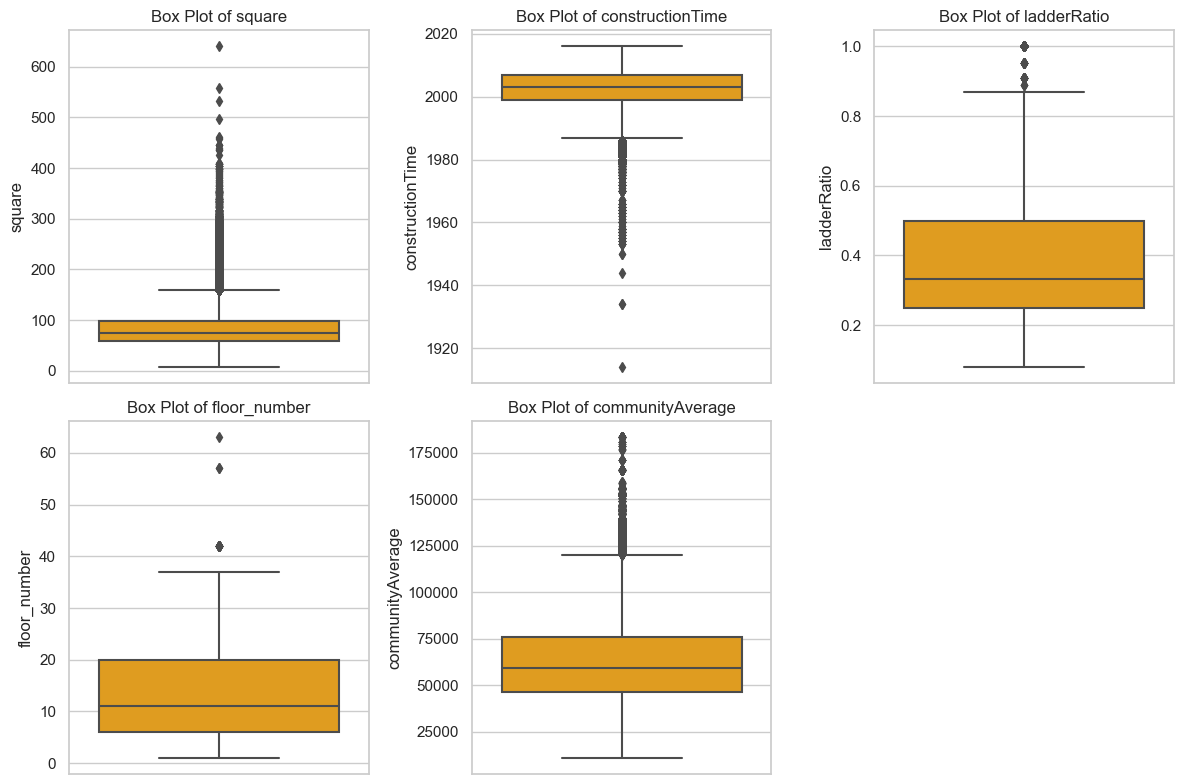

In [255]:
import matplotlib.pyplot as plt
import seaborn as sns

# 选择要绘制箱型图的特征
selected_features = ['square', 'constructionTime',  'ladderRatio', 'floor_number', 'communityAverage']

# 创建一个包含这些特征的子图
plt.figure(figsize=(12, 8))

# 循环遍历每个特征并绘制箱型图
for idx, feature in enumerate(selected_features):
    plt.subplot(2, 3, idx+1)
    
    # 绘制箱型图
    sns.boxplot(data=beijing, y=feature, color='orange')
    
    plt.title(f'Box Plot of {feature}')
    plt.ylabel(feature)

plt.tight_layout()
plt.show()


首先对5个连续性特征进行了箱型图绘制。发现BuildingStructure数据分布很好，使用四分位数进行异常值检测。可以得到以下信息：

In [256]:
# 选择要检测异常值的特征
selected_features = ['square', 'constructionTime', 'ladderRatio', 'floor_number', 'communityAverage']

# 遍历每个特征并检测异常值
for feature in selected_features:
    # 计算该特征的四分位数
    Q1 = beijing[feature].quantile(0.25)
    Q3 = beijing[feature].quantile(0.75)

    # 计算四分位距 (IQR)
    IQR = Q3 - Q1

    # 定义异常值的上下界
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # 找到该特征中的异常值# 遍历每个特征并检测异常值
for feature in selected_features:
    # 计算该特征的四分位数
    Q1 = beijing[feature].quantile(0.25)
    Q3 = beijing[feature].quantile(0.75)

    # 计算四分位距 (IQR)
    IQR = Q3 - Q1

    # 定义异常值的上下界
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # 找到该特征中的异常值
    outliers = (beijing[feature] < lower_bound) | (beijing[feature] > upper_bound)

    # 计算异常值的百分比
    outlier_percentage = (outliers.sum() / len(beijing)) * 100

    # 输出异常值数量和百分比
    print(f"{feature}: {outliers.sum()} ({outlier_percentage:.2f}%)")

    outliers = (beijing[feature] < lower_bound) | (beijing[feature] > upper_bound)


square: 11173 (3.59%)
constructionTime: 6920 (2.22%)
ladderRatio: 5888 (1.89%)
floor_number: 37 (0.01%)
communityAverage: 8420 (2.71%)


In [257]:
beijing[['square', 'constructionTime', 'ladderRatio', 'floor_number', 'communityAverage']].describe()

,square,constructionTime,ladderRatio,floor_number,communityAverage
count,311249.000000,311249.000000,311249.000000,311249.000000,310957.000000
mean,83.036448,2002.343728,0.379259,13.372882,63667.602997
std,35.656364,6.731799,0.156471,7.834821,22262.795289
min,7.370000,1914.000000,0.080000,1.000000,10847.000000
25%,58.050000,1999.000000,0.250000,6.000000,46352.000000
50%,74.380000,2003.000000,0.333000,11.000000,59015.000000
75%,98.680000,2007.000000,0.500000,20.000000,75858.000000
max,640.000000,2016.000000,1.000000,63.000000,183109.000000


随后通过对离群值进行统计性描述。首先，关于square、floor_number、communityAverage，虽然存在异常值，但是符合北京存在的严重的住房不平衡问题，住房面积、价格、楼层高低都可能存在很大的差异。因此，这3列中的异常值问题不做处理。此外constructionTime的虽然分布差异大，最早可以追溯到1950年，但是这也符合北京的住房状况。它们的最大值和最小值也证明了这一点。
可以看到有些数据一看就很荒谬。比如ladderRatio里的最大值是10009400，这代表每个人平均拥有10009400台电梯，显然需要处理。

因此，异常值的处理的重点放在了ladderRatio上。可以看到98%的数据都落在0.08到1之间。因此对ladderRatio的的异常值处理方法是过滤到低于0.8的和大于1的数据。

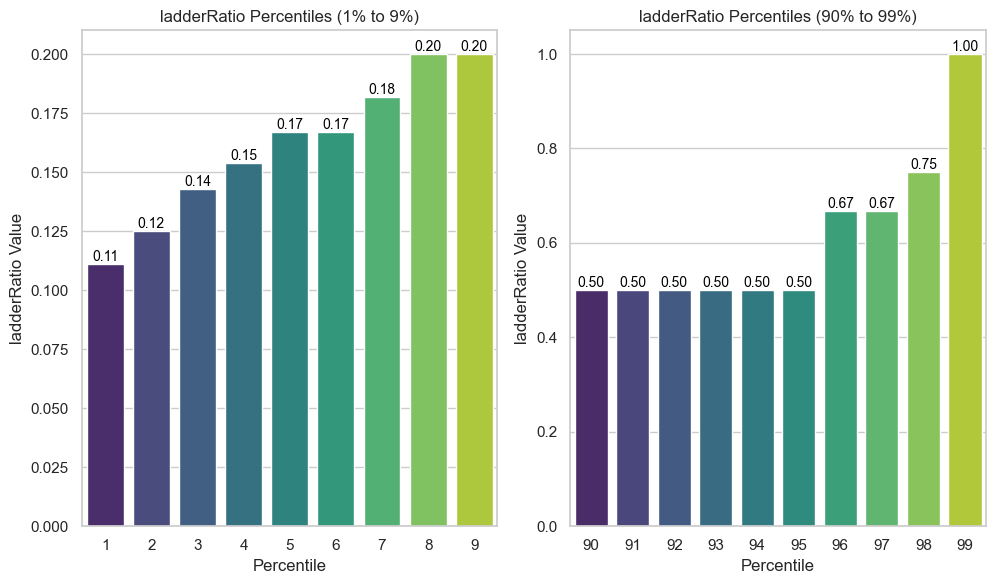

In [262]:
import matplotlib.pyplot as plt
import seaborn as sns

# 计算 'ladderRatio' 从5%到95%的分位值
percentiles_low = [i for i in range(1, 10, 1)]
percentiles_high = [i for i in range(90, 100, 1)]

# 计算相应分位值
percentile_values_low = beijing['ladderRatio'].quantile([p / 100 for p in percentiles_low])
percentile_values_high = beijing['ladderRatio'].quantile([p / 100 for p in percentiles_high])

# 创建横向柱状图
plt.figure(figsize=(15, 6))

# 绘制横向柱状图 - 低分位数
ax1 = plt.subplot(131)
sns.barplot(x=percentiles_low, y=percentile_values_low, palette="viridis")

# 添加数字标签 - 低分位数
for i, v in enumerate(percentile_values_low):
    ax1.text(i, v, f"{v:.2f}", color='black', va='bottom', ha='center', fontsize=10)

# 添加标题和标签 - 低分位数
ax1.set_title('ladderRatio Percentiles (1% to 9%)')
ax1.set_xlabel('Percentile')
ax1.set_ylabel('ladderRatio Value')

# 绘制横向柱状图 - 高分位数
ax2 = plt.subplot(132)
sns.barplot(x=percentiles_high, y=percentile_values_high, palette="viridis")

# 添加数字标签 - 高分位数
for i, v in enumerate(percentile_values_high):
    ax2.text(i, v, f"{v:.2f}", color='black', va='bottom', ha='center', fontsize=10)

# 添加标题和标签 - 高分位数
ax2.set_title('ladderRatio Percentiles (90% to 99%)')
ax2.set_xlabel('Percentile')
ax2.set_ylabel('ladderRatio Value')

# 调整布局
plt.tight_layout()
plt.show()


In [263]:
# 删除'ladderRatio'小于0.8和大于1的数据
beijing = beijing[beijing['ladderRatio'] >= 0.08]
beijing = beijing[ beijing['ladderRatio'] <=1]

# 确认数据已被删除
print("Number of rows after removing ladderRatio outliers:", len(beijing))


Number of rows after removing ladderRatio outliers: 311249


进行处理后，还剩下310957条数据。接下来重新绘制箱型图，发现这一次的效果有所增强。

In [264]:
beijing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 311249 entries, 0 to 318850
Data columns (total 24 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Lng                  311249 non-null  float64
 1   Lat                  311249 non-null  float64
 2   Cid                  311249 non-null  int64  
 3   totalPrice           311249 non-null  float64
 4   price                311249 non-null  int64  
 5   square               311249 non-null  float64
 6   livingRoom           311249 non-null  int64  
 7   drawingRoom          311249 non-null  int64  
 8   kitchen              311249 non-null  int64  
 9   bathRoom             311249 non-null  int64  
 10  buildingType         311249 non-null  float64
 11  constructionTime     311249 non-null  int64  
 12  renovationCondition  311249 non-null  int64  
 13  buildingStructure    311249 non-null  int64  
 14  ladderRatio          311249 non-null  float64
 15  elevator         

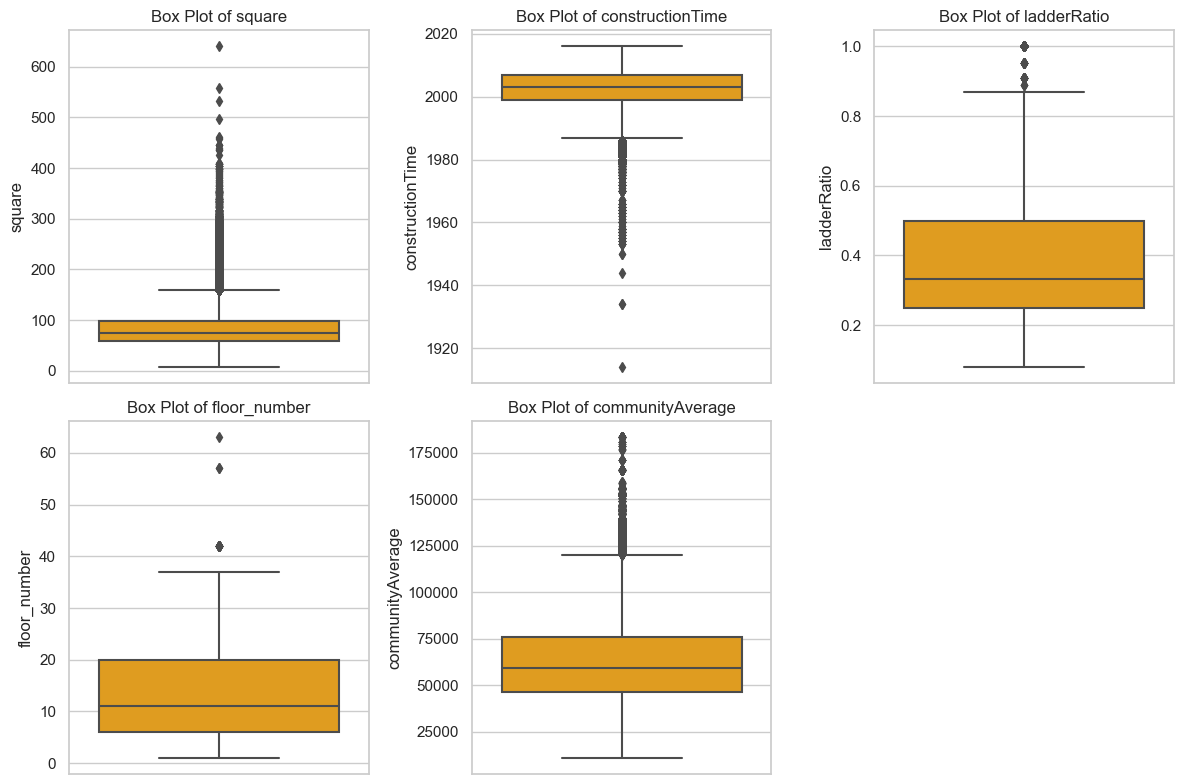

In [265]:
import matplotlib.pyplot as plt
import seaborn as sns

# 选择要绘制箱型图的特征
selected_features = ['square', 'constructionTime',  'ladderRatio', 'floor_number', 'communityAverage']

# 创建一个包含这些特征的子图
plt.figure(figsize=(12, 8))

# 循环遍历每个特征并绘制箱型图
for idx, feature in enumerate(selected_features):
    plt.subplot(2, 3, idx+1)
    
    # 绘制箱型图
    sns.boxplot(data=beijing, y=feature, color='orange')
    
    plt.title(f'Box Plot of {feature}')
    plt.ylabel(feature)

plt.tight_layout()
plt.show()


## 探索分析

### ladderRATIO

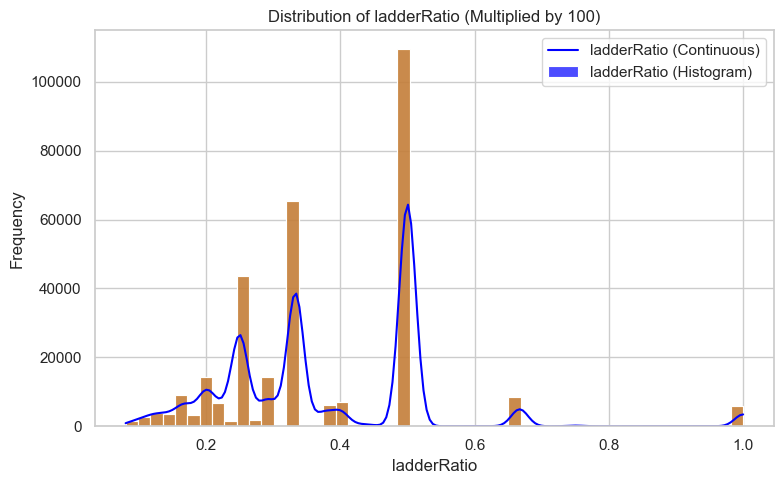

In [266]:
# Feature 4: 'ladderRatio'
plt.figure(figsize=(8, 5))
beijing['ladderRatio'] = beijing['ladderRatio']
sns.histplot(data=beijing, x='ladderRatio', kde=True, bins=50, color='blue', alpha=0.7)
sns.histplot(data=beijing, x='ladderRatio', bins=50, color='orange', alpha=0.7)
plt.title('Distribution of ladderRatio (Multiplied by 100)')
plt.xlabel('ladderRatio')
plt.ylabel('Frequency')
plt.legend(['ladderRatio (Continuous)', 'ladderRatio (Histogram)'])
plt.tight_layout()
plt.show()

In [267]:
# 导入pandas库
import pandas as pd

# 通过Pandas的value_counts()方法获取每个值的频次，并按频次降序排列
ladderRatio_counts = beijing['ladderRatio'].value_counts().sort_values(ascending=False)

# 获取前三个最大频次的数值和频次
top_three_values = ladderRatio_counts.index[:3]
top_three_frequencies = ladderRatio_counts.values[:3]

# 计算前三个最大频次的总频次
total_frequency_top_three = top_three_frequencies.sum()

print("Top three values with their frequencies and percentages in ladderRatio:")
for value, frequency in zip(top_three_values, top_three_frequencies):
    percentage = (frequency / total_frequency_top_three) * 100
    print(f"Value: {value}, Frequency: {frequency}, Percentage: {percentage:.2f}%")
    
# 导入pandas库
import pandas as pd

# 通过Pandas的value_counts()方法获取每个值的频次，并按频次降序排列
ladderRatio_counts = beijing['ladderRatio'].value_counts().sort_values(ascending=False)

# 获取前三个最大频次的数值和频次
top_three_values = ladderRatio_counts.index[:3]
top_three_frequencies = ladderRatio_counts.values[:3]

# 计算前三个最大频次的总频次
total_frequency_top_three = top_three_frequencies.sum()

# 计算前三个最大频次的总百分比
total_percentage_top_three = (total_frequency_top_three / len(beijing)) * 100

print("Total percentage of top three values in ladderRatio:")
print(f"Total Percentage: {total_percentage_top_three:.2f}%")



Top three values with their frequencies and percentages in ladderRatio:
Value: 0.5, Frequency: 109448, Percentage: 50.12%
Value: 0.333, Frequency: 65361, Percentage: 29.93%
Value: 0.25, Frequency: 43571, Percentage: 19.95%
Total percentage of top three values in ladderRatio:
Total Percentage: 70.16%


可以看到，ladderRatio最高频次的三个数值是0.5，0.333，0.25.它们加起来占了总数据的70.16%。这分别对应两户一梯、三户一梯、四户一梯。

### constructionTime

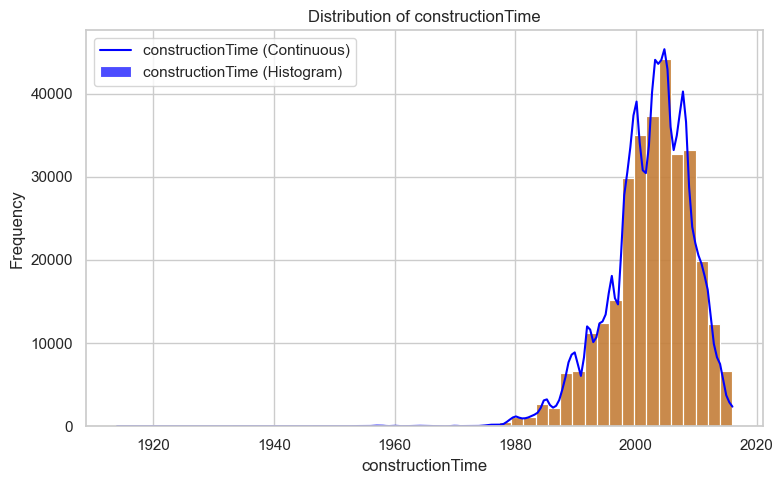

In [268]:
# Feature 2: 'constructionTime'
plt.figure(figsize=(8, 5))
sns.histplot(data=beijing, x='constructionTime', kde=True, bins=50, color='blue', alpha=0.7)
sns.histplot(data=beijing, x='constructionTime', bins=50, color='orange', alpha=0.7)
plt.title('Distribution of constructionTime')
plt.xlabel('constructionTime')
plt.ylabel('Frequency')
plt.legend(['constructionTime (Continuous)', 'constructionTime (Histogram)'])
plt.tight_layout()
plt.show()

本数据集中的房屋跨度很大，不过主要集中在1990-2015的区间。

### square

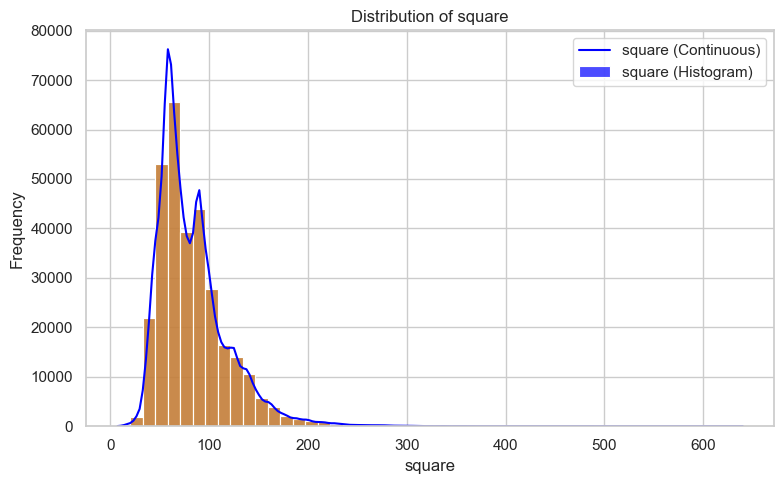

In [269]:
import matplotlib.pyplot as plt
import seaborn as sns

# Feature 1: 'square'
plt.figure(figsize=(8, 5))
sns.histplot(data=beijing, x='square', kde=True, bins=50, color='blue', alpha=0.7)
sns.histplot(data=beijing, x='square', bins=50, color='orange', alpha=0.7)
plt.title('Distribution of square')
plt.xlabel('square')
plt.ylabel('Frequency')
plt.legend(['square (Continuous)', 'square (Histogram)'])
plt.tight_layout()
plt.show()

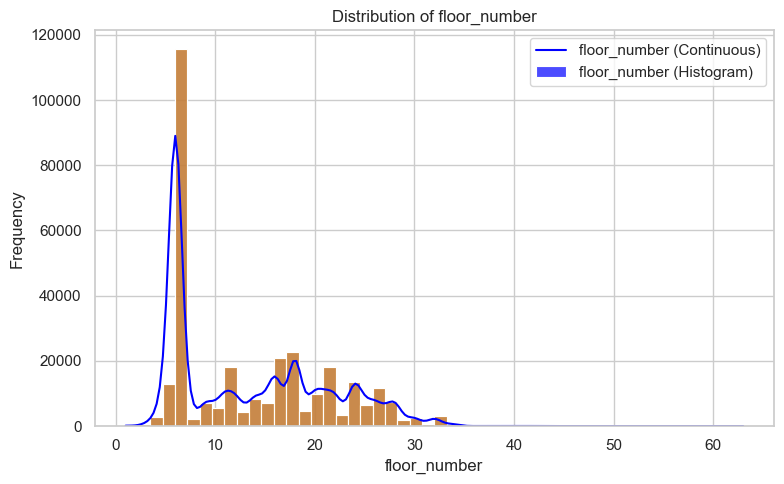

In [270]:
# Feature 5: 'floor_number'
plt.figure(figsize=(8, 5))
sns.histplot(data=beijing, x='floor_number', kde=True, bins=50, color='blue', alpha=0.7)
sns.histplot(data=beijing, x='floor_number', bins=50, color='orange', alpha=0.7)
plt.title('Distribution of floor_number')
plt.xlabel('floor_number')
plt.ylabel('Frequency')
plt.legend(['floor_number (Continuous)', 'floor_number (Histogram)'])
plt.tight_layout()
plt.show()


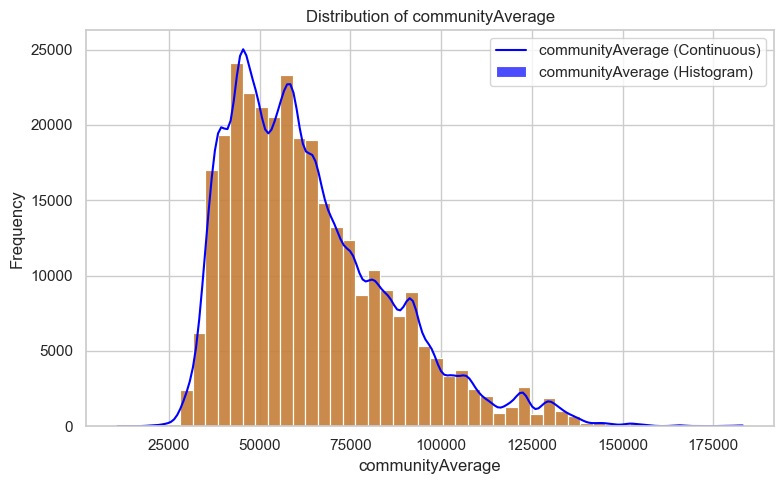

In [271]:
# Feature 6: 'communityAverage'
plt.figure(figsize=(8, 5))
sns.histplot(data=beijing, x='communityAverage', kde=True, bins=50, color='blue', alpha=0.7)
sns.histplot(data=beijing, x='communityAverage', bins=50, color='orange', alpha=0.7)
plt.title('Distribution of communityAverage')
plt.xlabel('communityAverage')
plt.ylabel('Frequency')
plt.legend(['communityAverage (Continuous)', 'communityAverage (Histogram)'])
plt.tight_layout()
plt.show()

 ### 4.4.3 Dependent Variable  (Categorical Features)

随后对分类变量进行了单变量分析，包括这些：district livingRoom drawingRoom kitchen bathRoom buildingType elevator fiveYearsProperty subway tradeYear tradeMonth tradeDay Cid buildingStructure

'livingRoom', 'drawingRoom', 'kitchen', 'bathRoom',

'tradeMonth', 'tradeDay','tradeYear'

 'elevator''fiveYearsProperty''subway' 

'district''buildingType', 'buildingStructure' 'renovationCondition'

buildingStructure: including unknow( 1 ), mixed( 2 ), brick and wood( 3 ), brick and concrete( 4 ),steel( 5 ) and steel-concrete composite ( 6 ).
buildingType: including tower( 1 ) , bungalow( 2 )，combination of plate and tower( 3 ), plate( 4 ).
renovationCondition: including other( 1 ), rough( 2 ),Simplicity( 3 ), hardcover( 4 )




   'Cid'

Top 3 frequencies for livingRoom:
2: 158287 (50.9%)
1: 79088 (25.4%)
3: 66501 (21.4%)

Top 3 frequencies for drawingRoom:
1: 221068 (71.0%)
2: 70976 (22.8%)
0: 18463 (5.9%)

Top 3 frequencies for kitchen:
1: 308140 (99.0%)
0: 2337 (0.8%)
2: 754 (0.2%)

Top 3 frequencies for bathRoom:
1: 255732 (82.2%)
2: 51800 (16.6%)
3: 2659 (0.9%)



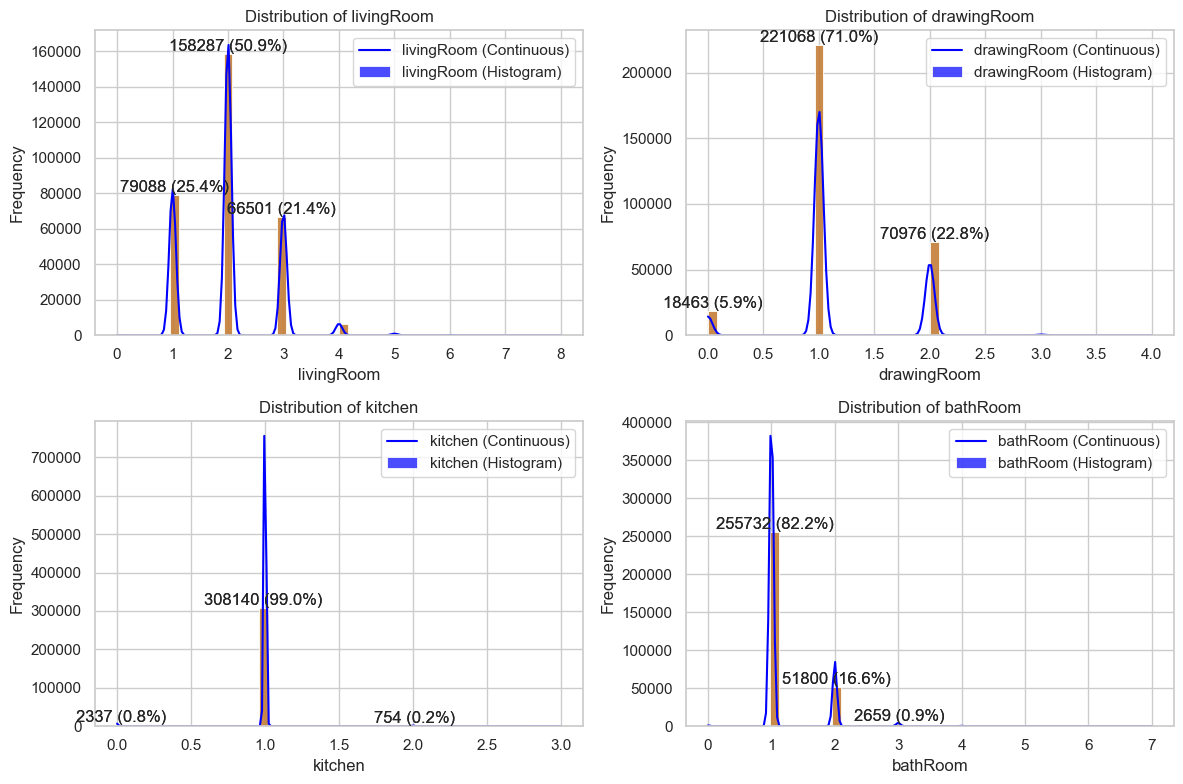

In [272]:
import matplotlib.pyplot as plt
import seaborn as sns

# Features to plot
features_to_plot = ['livingRoom', 'drawingRoom', 'kitchen', 'bathRoom']

# Set plot style
sns.set(style="whitegrid")

# Create a single figure for all subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Flatten the axes array for easy iteration
axes = axes.ravel()

# Initialize a dictionary to store top 3 frequencies and percentages for each feature
top_3_frequencies = {feature: [] for feature in features_to_plot}

# Loop through each feature and plot the distribution
for i, feature in enumerate(features_to_plot):
    sns.histplot(data=beijing, x=feature, kde=True, bins=50, color='blue', alpha=0.7, ax=axes[i])
    sns.histplot(data=beijing, x=feature, bins=50, color='orange', alpha=0.7, ax=axes[i])
    axes[i].set_title(f'Distribution of {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Frequency')
    axes[i].legend([f'{feature} (Continuous)', f'{feature} (Histogram)'])
    
    # Calculate and store the top 3 frequencies for this feature
    top_frequencies = beijing[feature].value_counts().nlargest(3)
    top_3_frequencies[feature] = top_frequencies
    
    # Annotate the bars with numeric labels and percentages for the top 3 frequencies
    total_count = beijing[feature].count()
    for bar in axes[i].patches:
        height = bar.get_height()
        x = bar.get_x() + bar.get_width() / 2
        if height in top_frequencies.values:
            percentage = (height / total_count) * 100
            axes[i].annotate(f"{int(height)} ({percentage:.1f}%)", (x, height), ha='center', va='bottom')

# Display the top 3 frequencies and percentages for each feature
for feature, frequencies in top_3_frequencies.items():
    print(f"Top 3 frequencies for {feature}:")
    for value, count in frequencies.items():
        percentage = (count / beijing[feature].count()) * 100
        print(f"{value}: {count} ({percentage:.1f}%)")
    print()

# Adjust layout and display the figure
plt.tight_layout()
plt.show()


首先进行的是频次分析。这有助于了解数据基本特征。这一部分首先对房价预测中很重要的的房间数量进行了频次绘制。可以看出，北京的许多房屋有2~4个livingRoom，1或2个drawingRoom，1个kitchen，1或2个bathroom。

Top 3 frequencies for tradeMonth:
3: 37106 (11.9%)
12: 30873 (9.9%)
8: 29909 (9.6%)

Top 3 frequencies for tradeDay:
28: 12040 (3.9%)
27: 11669 (3.7%)
26: 11095 (3.6%)

Top 3 frequencies for tradeYear:
2016: 88453 (28.4%)
2015: 68075 (21.9%)
2017: 42219 (13.6%)



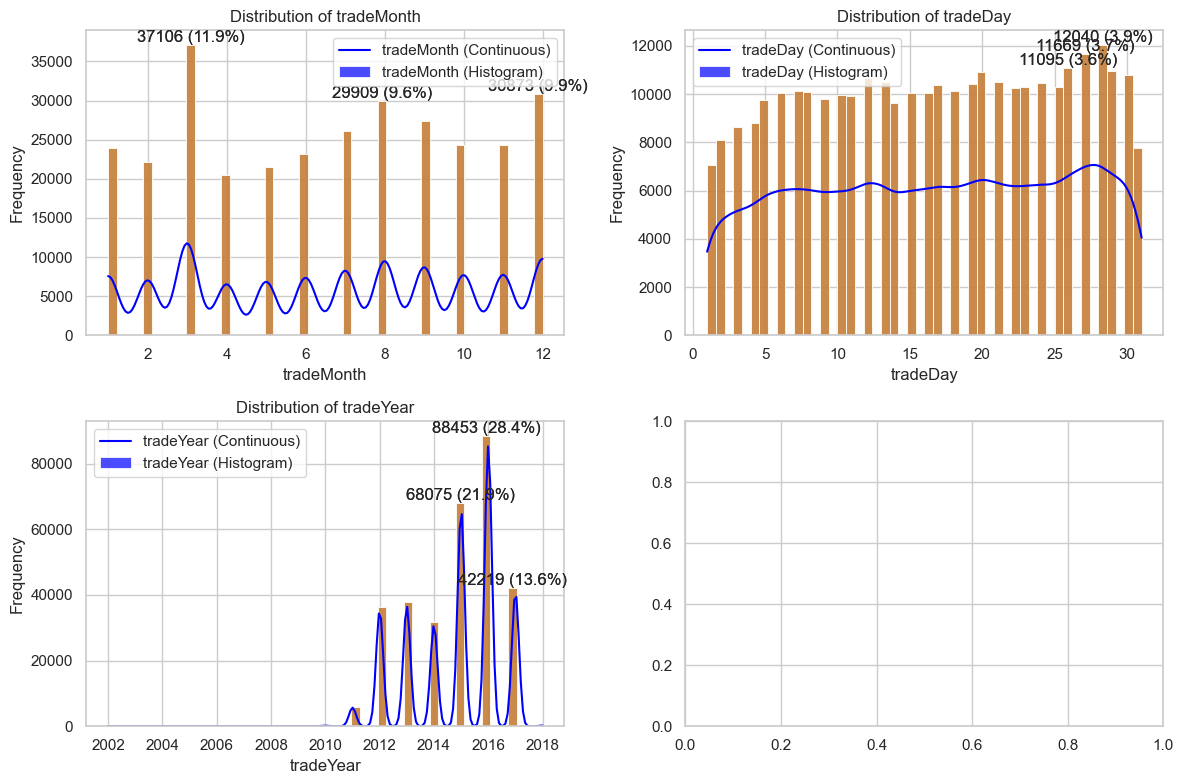

In [273]:
'elevator''fiveYearsProperty''subway'

import matplotlib.pyplot as plt
import seaborn as sns

# Features to plot
features_to_plot = ['tradeMonth', 'tradeDay','tradeYear']

# Set plot style
sns.set(style="whitegrid")

# Create a single figure for all subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Flatten the axes array for easy iteration
axes = axes.ravel()

# Initialize a dictionary to store top 3 frequencies and percentages for each feature
top_3_frequencies = {feature: [] for feature in features_to_plot}

# Loop through each feature and plot the distribution
for i, feature in enumerate(features_to_plot):
    sns.histplot(data=beijing, x=feature, kde=True, bins=50, color='blue', alpha=0.7, ax=axes[i])
    sns.histplot(data=beijing, x=feature, bins=50, color='orange', alpha=0.7, ax=axes[i])
    axes[i].set_title(f'Distribution of {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Frequency')
    axes[i].legend([f'{feature} (Continuous)', f'{feature} (Histogram)'])
    
    # Calculate and store the top 3 frequencies for this feature
    top_frequencies = beijing[feature].value_counts().nlargest(3)
    top_3_frequencies[feature] = top_frequencies
    
    # Annotate the bars with numeric labels and percentages for the top 3 frequencies
    total_count = beijing[feature].count()
    for bar in axes[i].patches:
        height = bar.get_height()
        x = bar.get_x() + bar.get_width() / 2
        if height in top_frequencies.values:
            percentage = (height / total_count) * 100
            axes[i].annotate(f"{int(height)} ({percentage:.1f}%)", (x, height), ha='center', va='bottom')

# Display the top 3 frequencies and percentages for each feature
for feature, frequencies in top_3_frequencies.items():
    print(f"Top 3 frequencies for {feature}:")
    for value, count in frequencies.items():
        percentage = (count / beijing[feature].count()) * 100
        print(f"{value}: {count} ({percentage:.1f}%)")
    print()

# Adjust layout and display the figure
plt.tight_layout()
plt.show()


随后，本实验对交易的三个时间变量进行了可视化处理。可以看到，月份和日期几乎不对交易频次产生很大影响。而在年份上，2015和2016选择卖房的人尤其多。而从后面的多元变量分析看，2017年之后房价就突然下跌。这不禁让人wonder期间发生了什么。

Top 3 frequencies for elevator:
1.0: 180207 (57.9%)
0.0: 131042 (42.1%)

Top 3 frequencies for fiveYearsProperty:
1.0: 201611 (64.8%)
0.0: 109638 (35.2%)

Top 3 frequencies for subway:
1.0: 186997 (60.1%)
0.0: 124252 (39.9%)



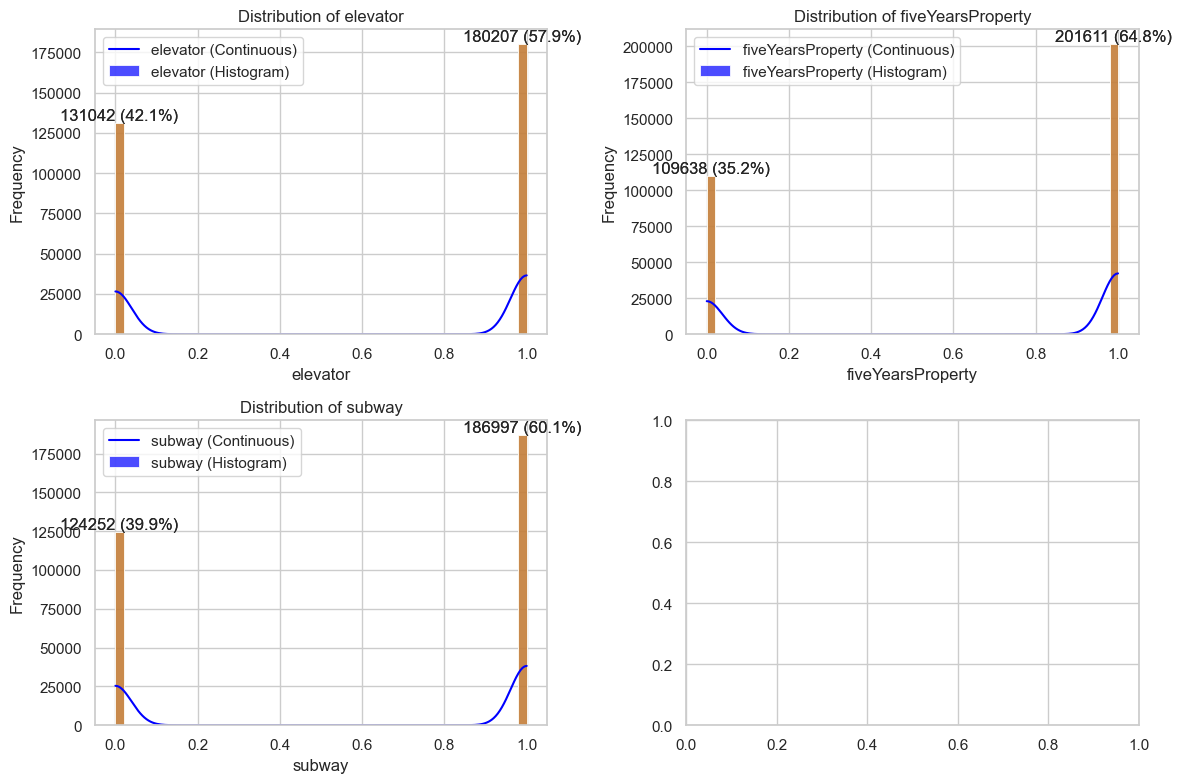

In [274]:


import matplotlib.pyplot as plt
import seaborn as sns

# Features to plot
features_to_plot = ['elevator','fiveYearsProperty','subway']

# Set plot style
sns.set(style="whitegrid")

# Create a single figure for all subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Flatten the axes array for easy iteration
axes = axes.ravel()

# Initialize a dictionary to store top 3 frequencies and percentages for each feature
top_3_frequencies = {feature: [] for feature in features_to_plot}

# Loop through each feature and plot the distribution
for i, feature in enumerate(features_to_plot):
    sns.histplot(data=beijing, x=feature, kde=True, bins=50, color='blue', alpha=0.7, ax=axes[i])
    sns.histplot(data=beijing, x=feature, bins=50, color='orange', alpha=0.7, ax=axes[i])
    axes[i].set_title(f'Distribution of {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Frequency')
    axes[i].legend([f'{feature} (Continuous)', f'{feature} (Histogram)'])
    
    # Calculate and store the top 3 frequencies for this feature
    top_frequencies = beijing[feature].value_counts().nlargest(3)
    top_3_frequencies[feature] = top_frequencies
    
    # Annotate the bars with numeric labels and percentages for the top 3 frequencies
    total_count = beijing[feature].count()
    for bar in axes[i].patches:
        height = bar.get_height()
        x = bar.get_x() + bar.get_width() / 2
        if height in top_frequencies.values:
            percentage = (height / total_count) * 100
            axes[i].annotate(f"{int(height)} ({percentage:.1f}%)", (x, height), ha='center', va='bottom')

# Display the top 3 frequencies and percentages for each feature
for feature, frequencies in top_3_frequencies.items():
    print(f"Top 3 frequencies for {feature}:")
    for value, count in frequencies.items():
        percentage = (count / beijing[feature].count()) * 100
        print(f"{value}: {count} ({percentage:.1f}%)")
    print()

# Adjust layout and display the figure
plt.tight_layout()
plt.show()

紧接着分析了三个0/1变量：elevator，fiveYearProperty，subway。可以看到多数房屋有电梯、满足五年交易、靠近地铁。

'renovationCondition'

buildingStructure: including unknow( 1 ), mixed( 2 ), brick and wood( 3 ), brick and concrete( 4 ),steel( 5 ) and steel-concrete composite ( 6 ).
buildingType: including tower( 1 ) , bungalow( 2 )，combination of plate and tower( 3 ), plate( 4 ).
renovationCondition: including other( 1 ), rough( 2 ),Simplicity( 3 ), hardcover( 4 )



Top 3 frequencies for district:
7: 105566 (33.9%)
6: 37661 (12.1%)
8: 37278 (12.0%)

Top 3 frequencies for buildingType:
4.0: 169648 (54.5%)
1.0: 83187 (26.7%)
3.0: 58310 (18.7%)

Top 3 frequencies for buildingStructure:
6: 183251 (58.9%)
2: 113697 (36.5%)
4: 13986 (4.5%)

Top 3 frequencies for renovationCondition:
1: 115805 (37.2%)
4: 114834 (36.9%)
3: 75460 (24.2%)



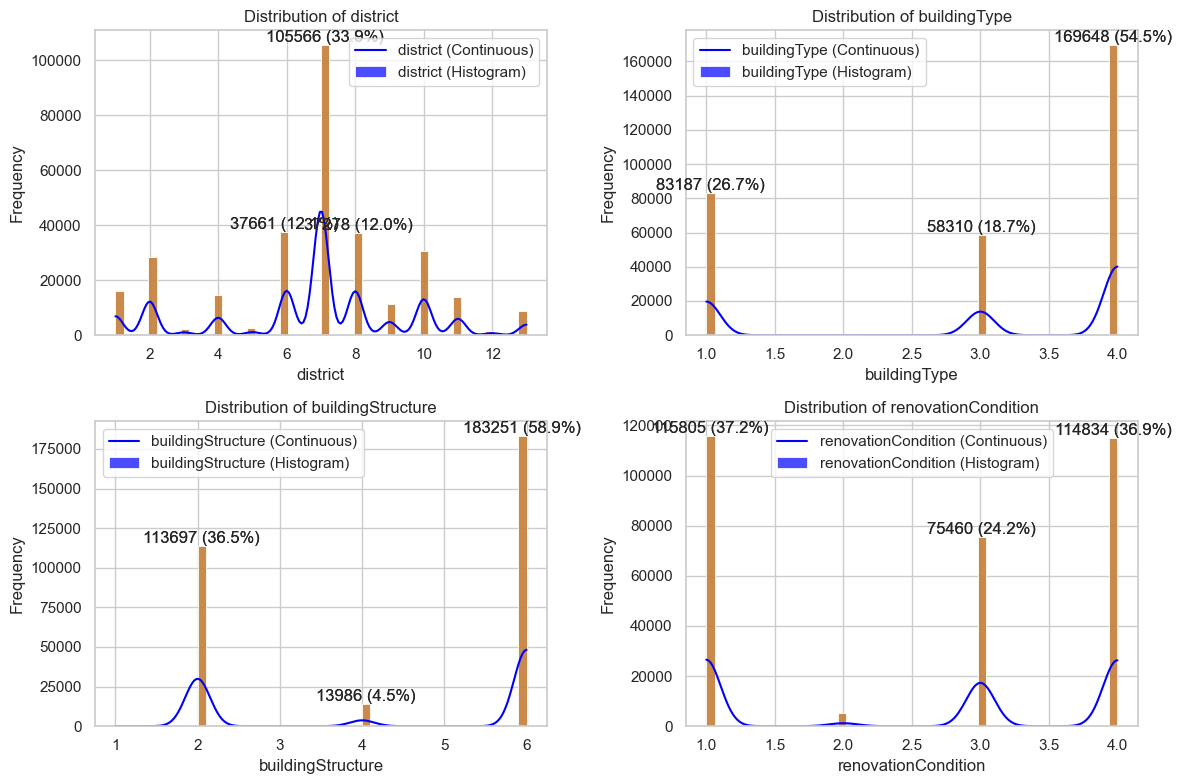

In [275]:


import matplotlib.pyplot as plt
import seaborn as sns

# Features to plot
features_to_plot = ['district','buildingType', 'buildingStructure','renovationCondition']

# Set plot style
sns.set(style="whitegrid")

# Create a single figure for all subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Flatten the axes array for easy iteration
axes = axes.ravel()

# Initialize a dictionary to store top 3 frequencies and percentages for each feature
top_3_frequencies = {feature: [] for feature in features_to_plot}

# Loop through each feature and plot the distribution
for i, feature in enumerate(features_to_plot):
    sns.histplot(data=beijing, x=feature, kde=True, bins=50, color='blue', alpha=0.7, ax=axes[i])
    sns.histplot(data=beijing, x=feature, bins=50, color='orange', alpha=0.7, ax=axes[i])
    axes[i].set_title(f'Distribution of {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Frequency')
    axes[i].legend([f'{feature} (Continuous)', f'{feature} (Histogram)'])
    
    # Calculate and store the top 3 frequencies for this feature
    top_frequencies = beijing[feature].value_counts().nlargest(3)
    top_3_frequencies[feature] = top_frequencies
    
    # Annotate the bars with numeric labels and percentages for the top 3 frequencies
    total_count = beijing[feature].count()
    for bar in axes[i].patches:
        height = bar.get_height()
        x = bar.get_x() + bar.get_width() / 2
        if height in top_frequencies.values:
            percentage = (height / total_count) * 100
            axes[i].annotate(f"{int(height)} ({percentage:.1f}%)", (x, height), ha='center', va='bottom')

# Display the top 3 frequencies and percentages for each feature
for feature, frequencies in top_3_frequencies.items():
    print(f"Top 3 frequencies for {feature}:")
    for value, count in frequencies.items():
        percentage = (count / beijing[feature].count()) * 100
        print(f"{value}: {count} ({percentage:.1f}%)")
    print()

# Adjust layout and display the figure
plt.tight_layout()
plt.show()

接下来对其他几个房屋属性进行了分析。发现大部分交易发生在6，7，8区；大多数房屋使用brick and concrete结构和steel-concrete composite，装修状况为 including other或hardcover

通过单变量分析，北京房屋交易的properties的大致特征被掌握。为了进一步掌握变量间的关系，还需要多变量分析。

## 4.4 EDA: Multivariate Analysis

多元分析有助于发现更多组合信息、缓解共线性、找出和预测价格相关的变量。

## 首先画地图

In [276]:
import folium
from folium.plugins import HeatMap

# 创建一个地图对象
m = folium.Map(location=[39.9042, 116.4074], zoom_start=11)  # 这里设置了地图的初始位置和缩放级别

# 添加英文图层
folium.TileLayer('cartodb positron').add_to(m)

# 从 'beijing' 数据中获取经度和纬度数据
data = beijing[['Lat', 'Lng']].values

# 调整热力图半径，使其更细致
# 调整颜色渐变以突出中心区域和差异
HeatMap(data, radius=10, gradient={0.2: 'blue', 0.4: 'green', 0.6: 'yellow', 1: 'red'}).add_to(m)

# 保存地图为HTML文件
m.save('transaction_heatmap_english.html')


In [277]:
import folium
from folium.plugins import HeatMap

# 创建一个地图对象
m = folium.Map(location=[39.9042, 116.4074], zoom_start=11)  # 这里设置了地图的初始位置和缩放级别

# 添加英文图层
folium.TileLayer('cartodb positron').add_to(m)

# 从 'beijing' 数据中获取经度、纬度和总价格数据
data = beijing[['Lat', 'Lng', 'totalPrice']].values

# 调整热力图半径，使其更细致
# 调整颜色渐变以突出价格差异
HeatMap(data, radius=10, gradient={0.2: 'blue', 0.4: 'green', 0.6: 'yellow', 1: 'red'}).add_to(m)

# 在某些坐标点上添加价格数值标记
for lat, lng, price in data[:10]:  # 只添加前10个标记，可根据需要更改
    folium.Marker([lat, lng], icon=folium.DivIcon(html=f'<div>{price:.2f}</div>')).add_to(m)

# 保存地图为HTML文件
m.save('price_heatmap_with_values.html')


## 然后画二元散点图

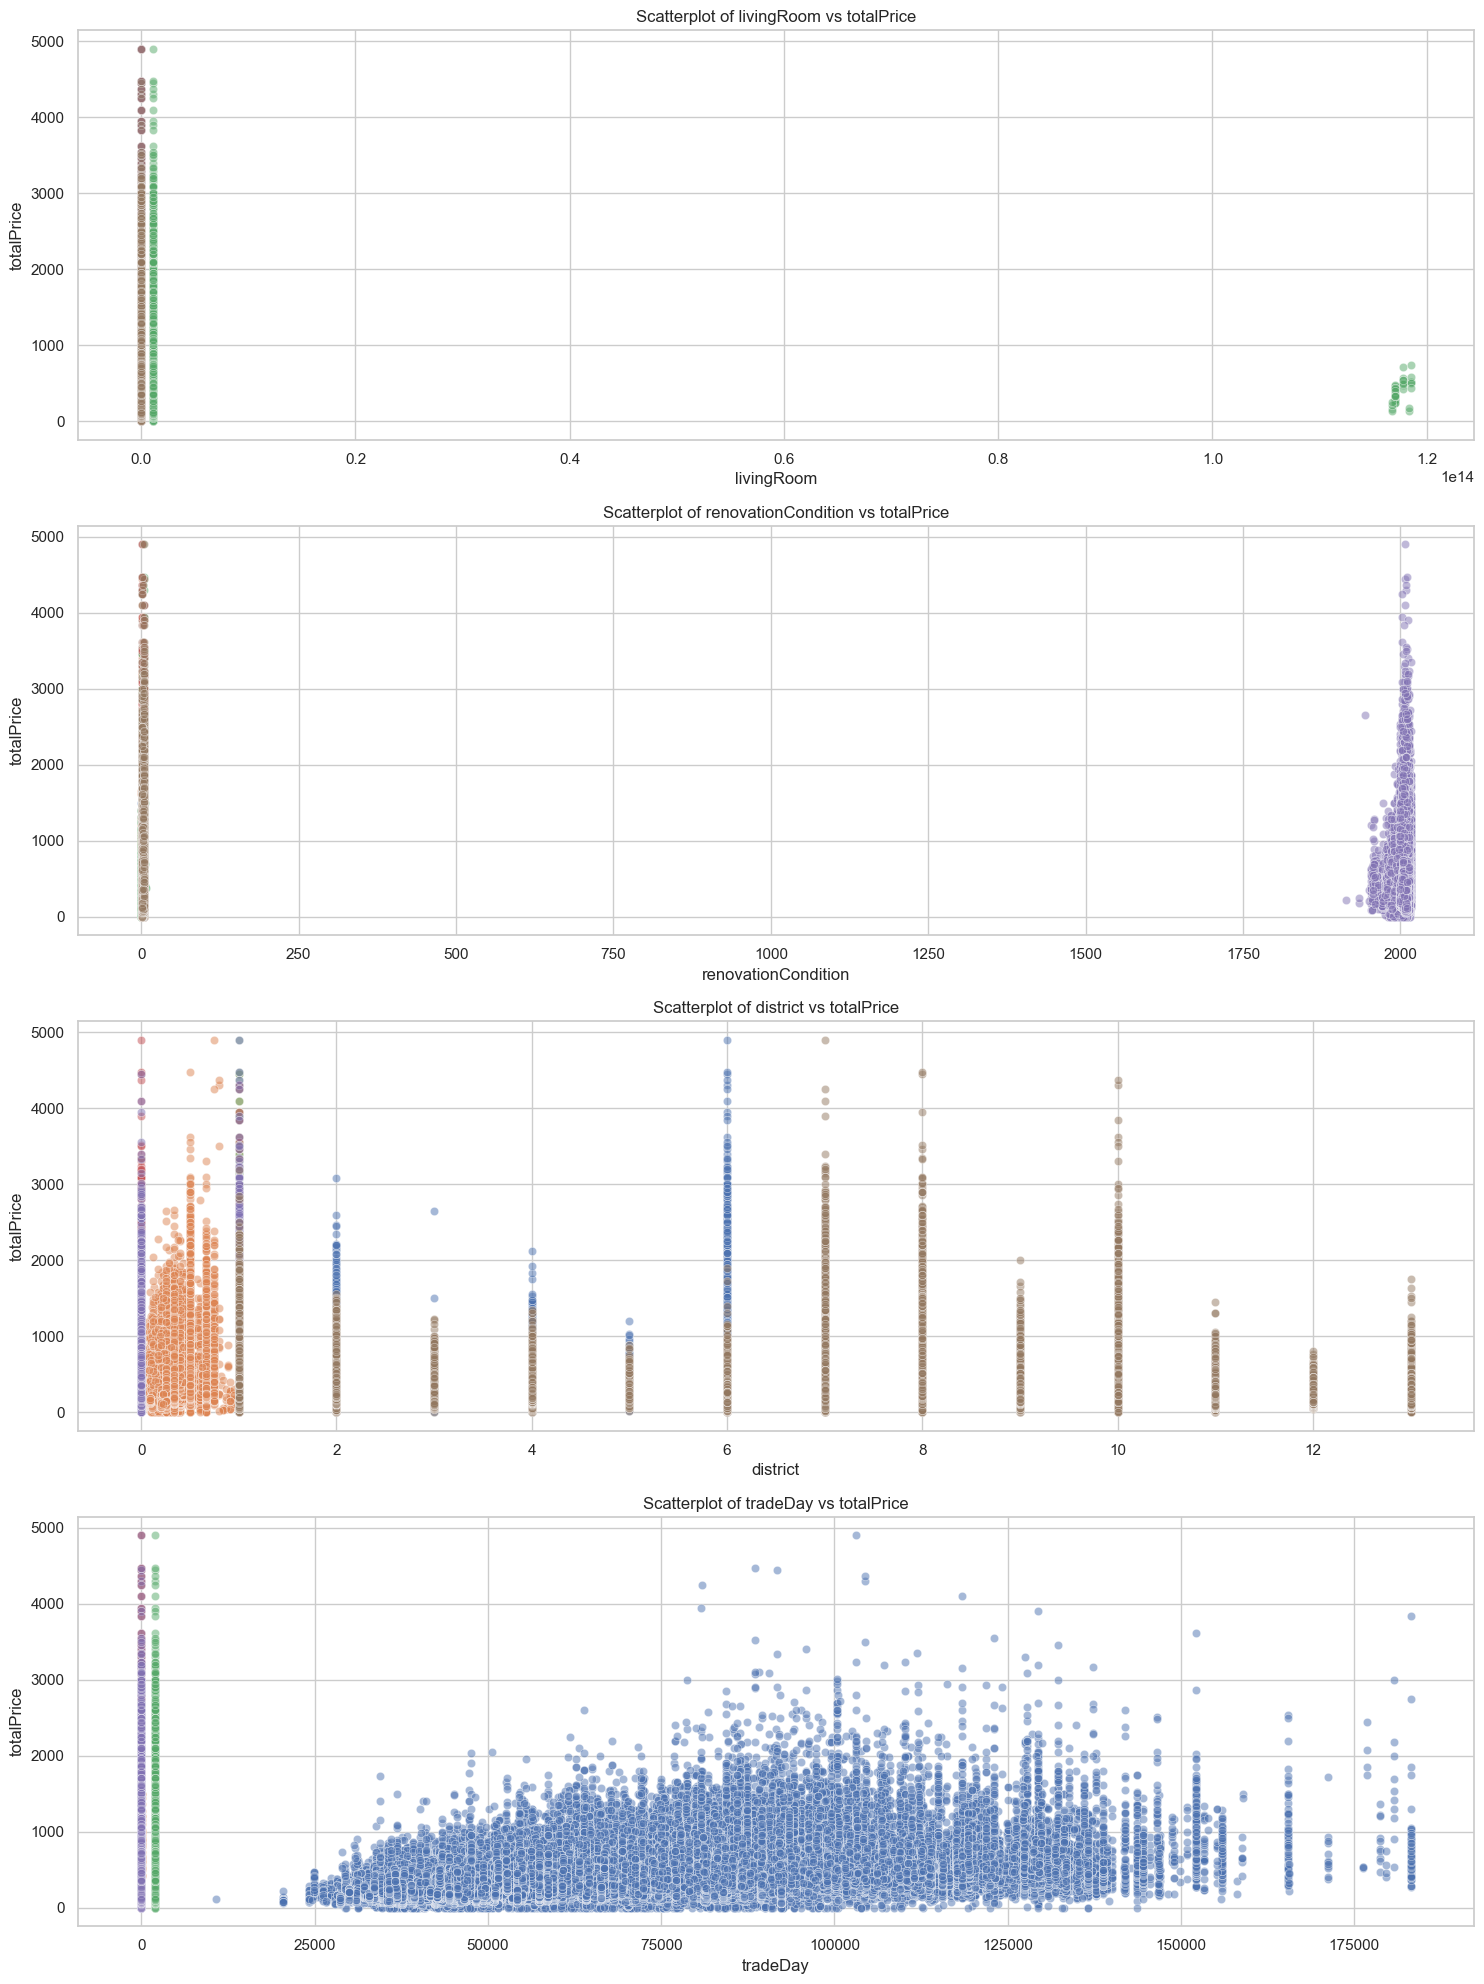

In [278]:
import matplotlib.pyplot as plt
import seaborn as sns

# 创建一个包含除totalPrice以外的所有特征的子数据集
features = beijing.drop(columns=['totalPrice'])

# 每次绘制的特征数量
features_per_plot = 6

# 计算需要绘制的次数
num_plots = len(features.columns) // features_per_plot + 1

# 设置绘图的布局
plt.figure(figsize=(15, 5 * num_plots))

# 遍历每个特征并绘制二元散点图
for i, feature in enumerate(features.columns):
    if i % features_per_plot == 0:
        plt.subplot(num_plots, 1, i // features_per_plot + 1)  # 创建子图
    sns.scatterplot(data=beijing, x=feature, y='totalPrice', alpha=0.5)  # 绘制散点图
    plt.title(f'Scatterplot of {feature} vs totalPrice')
    plt.xlabel(feature)
    plt.ylabel('totalPrice')

plt.tight_layout()
plt.show()


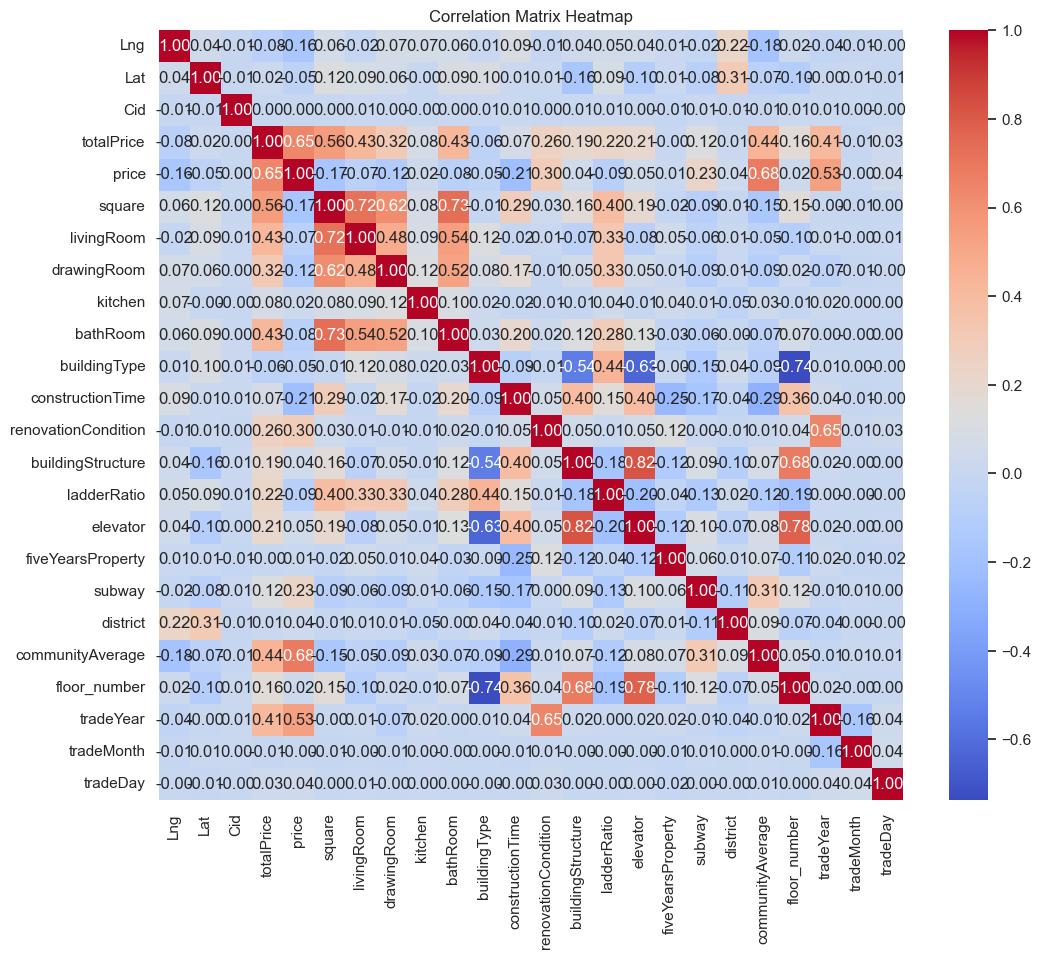

In [282]:

correlation_matrix = beijing.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()


In [285]:
# 创建柱状图并指定颜色
plt.figure(figsize=(10, 6))
sns.barplot(x=correlation_matrix.index, y=correlation_matrix.values, palette='coolwarm_r')
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Absolute Correlation with totalPrice')
plt.title('Correlation between Features and totalPrice')

# 标注数字
for i, v in enumerate(correlation_matrix.values):
    plt.text(i, v, f"{v:.2f}", ha='center', va='bottom', fontsize=10)

plt.show()


ValueError: Data must be 1-dimensional

<Figure size 1000x600 with 0 Axes>

进行相关系数矩阵热力图分析，可以看到totalPrice相关系数最高的一次是square, bathRoom, livingRoom, renovationCondition, ladderRatio,elevator。此外，许多特征之间也存在很强的相关性。

In [287]:
beijing.drop(['price','communityAverage'], axis=1, inplace=True)

### Save datasets 

In [288]:
beijing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 311249 entries, 0 to 318850
Data columns (total 22 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Lng                  311249 non-null  float64
 1   Lat                  311249 non-null  float64
 2   Cid                  311249 non-null  int64  
 3   totalPrice           311249 non-null  float64
 4   square               311249 non-null  float64
 5   livingRoom           311249 non-null  int64  
 6   drawingRoom          311249 non-null  int64  
 7   kitchen              311249 non-null  int64  
 8   bathRoom             311249 non-null  int64  
 9   buildingType         311249 non-null  float64
 10  constructionTime     311249 non-null  int64  
 11  renovationCondition  311249 non-null  int64  
 12  buildingStructure    311249 non-null  int64  
 13  ladderRatio          311249 non-null  float64
 14  elevator             311249 non-null  float64
 15  fiveYearsProperty

In [289]:
beijing.to_csv('beijingDataset.csv', encoding='gbk')